ANALYSIS OF DECISION TREE AND ENSEMBLE DECISION TREE ON MONK1,2,3

Import libraries and modules

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/Shareddrives/ML_PROJECT')

Mounted at /content/drive


In [41]:
%%capture
!pip install scikit-plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.ensemble import AdaBoostClassifier

In [6]:
def report_best(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
          return results["mean_test_score"][candidate]

In [7]:
def report_best_std(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
          return results["std_test_score"][candidate]

In [8]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

before starting: quick point on one hot encoding vs dummy encoding (ie. usage of drop first)

In [9]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = onehot_encoder.fit_transform(df_train.iloc[:,:-1].astype('str'))
#instanciate clf
#get mean value
mean_l = []
for _ in range(100):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=10, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  #f1_scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=10, random_state=None, shuffle=True), scoring='f1_macro')
  #print('F1-score: %0.4f (+/- %0.2f)' % (f1_scores.mean(), f1_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

NameError: ignored

In [10]:
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_encoded = onehot_encoder.fit_transform(df_train.iloc[:,:-1].astype('str'))
#instanciate clf
#get mean value
mean_l = []
for _ in range(100):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=10, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  #f1_scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=10, random_state=None, shuffle=True), scoring='f1_macro')
  #print('F1-score: %0.4f (+/- %0.2f)' % (f1_scores.mean(), f1_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

NameError: ignored

## Import Monk datasets

Monk 1

In [11]:
#import&clean Monk_train 1
monk1_train = pd.read_csv('monks-1_train.csv', sep=' ', header= None)
monk1_train.drop([0,8], axis=1, inplace = True)
rename_dict = {}
for i in range(2,8): 
  rename_dict[i] = f"attr_{i-1}"
rename_dict.update({1:'target'})
monk1_train.rename( columns=rename_dict, inplace =True)
monk1_train = monk1_train[list(monk1_train)[1:] + list(monk1_train)[:-6]]

In [12]:
#import&clean Monk_test 1
monk1_test = pd.read_csv('monks-1_test.csv', sep=' ', header= None)
monk1_test.drop([0,8], axis=1, inplace = True)
rename_dict = {}
for i in range(2,8): 
  rename_dict[i] = f"attr_{i-1}"
rename_dict.update({1:'target'})
monk1_test.rename( columns=rename_dict, inplace =True)
monk1_test = monk1_test[list(monk1_test)[1:] + list(monk1_test)[:-6]]

#remove training set from test set
monk_temp = monk1_test.append(monk1_train, ignore_index =True)
duplicated_indexes = monk_temp.duplicated(keep=False)
monk1_test = monk_temp.drop(monk_temp.loc[duplicated_indexes,:].index).copy()

Monk 2

In [13]:
#import&clean Monk_train 2
monk2_train = pd.read_csv('monks-2_train.csv', sep=' ', header= None)
monk2_train.drop([0,8], axis=1, inplace = True)
rename_dict = {}
for i in range(2,8): 
  rename_dict[i] = f"attr_{i-1}"
rename_dict.update({1:'target'})
monk2_train.rename( columns=rename_dict, inplace =True)
monk2_train = monk2_train[list(monk2_train)[1:] + list(monk2_train)[:-6]]

In [14]:
#import&clean Monk_test 2
monk2_test = pd.read_csv('monks-2_test.csv', sep=' ', header= None)
monk2_test.drop([0,8], axis=1, inplace = True)
rename_dict = {}
for i in range(2,8): 
  rename_dict[i] = f"attr_{i-1}"
rename_dict.update({1:'target'})
monk2_test.rename( columns=rename_dict, inplace =True)
monk2_test = monk2_test[list(monk2_test)[1:] + list(monk2_test)[:-6]]

#remove training set from test set
monk_temp = monk2_test.append(monk2_train, ignore_index =True)
duplicated_indexes = monk_temp.duplicated(keep=False)
monk2_test = monk_temp.drop(monk_temp.loc[duplicated_indexes,:].index).copy()

Monk 3

In [24]:
#import&clean Monk_train 2
monk3_train = pd.read_csv('monks-3_train.csv', sep=' ', header= None)
monk3_train.drop([0,8], axis=1, inplace = True)
rename_dict = {}
for i in range(2,8): 
  rename_dict[i] = f"attr_{i-1}"
rename_dict.update({1:'target'})
monk3_train.rename( columns=rename_dict, inplace =True)
monk3_train = monk3_train[list(monk3_train)[1:] + list(monk3_train)[:-6]]

In [25]:
#import&clean Monk_test 2
monk3_test = pd.read_csv('monks-3_test.csv', sep=' ', header= None)
monk3_test.drop([0,8], axis=1, inplace = True)
rename_dict = {}
for i in range(2,8): 
  rename_dict[i] = f"attr_{i-1}"
rename_dict.update({1:'target'})
monk3_test.rename( columns=rename_dict, inplace =True)
monk3_test = monk3_test[list(monk3_test)[1:] + list(monk3_test)[:-6]]

#remove training set from test set
monk_temp = monk3_test.append(monk3_train, ignore_index =True)
duplicated_indexes = monk_temp.duplicated(keep=False)
monk3_test = monk_temp.drop(monk_temp.loc[duplicated_indexes,:].index).copy()

### Statistics on MONKS

Monk 1

In [33]:
#Show details of categorical attributes
for column in list(monk1_train):
    print('Monk1')
    print(str(column) + ' : ' + str(monk1_train[column].unique()))
    print(monk1_train[column].value_counts())
    print('Monk2')
    print(str(column) + ' : ' + str(monk2_train[column].unique()))
    print(monk2_train[column].value_counts())
    print('Monk3')
    print(str(column) + ' : ' + str(monk3_train[column].unique()))
    print(monk3_train[column].value_counts())
    print("_________________________________________________________________")

Monk1
attr_1 : [1 2 3]
1    45
2    42
3    37
Name: attr_1, dtype: int64
Monk2
attr_1 : [1 2 3]
2    57
1    57
3    55
Name: attr_1, dtype: int64
Monk3
attr_1 : [1 2 3]
1    48
2    40
3    34
Name: attr_1, dtype: int64
_________________________________________________________________
Monk1
attr_2 : [1 2 3]
3    47
2    42
1    35
Name: attr_2, dtype: int64
Monk2
attr_2 : [1 2 3]
2    63
1    55
3    51
Name: attr_2, dtype: int64
Monk3
attr_2 : [1 2 3]
2    42
3    41
1    39
Name: attr_2, dtype: int64
_________________________________________________________________
Monk1
attr_3 : [1 2]
1    65
2    59
Name: attr_3, dtype: int64
Monk2
attr_3 : [1 2]
2    86
1    83
Name: attr_3, dtype: int64
Monk3
attr_3 : [1 2]
1    65
2    57
Name: attr_3, dtype: int64
_________________________________________________________________
Monk1
attr_4 : [1 3 2]
3    43
1    42
2    39
Name: attr_4, dtype: int64
Monk2
attr_4 : [1 2 3]
3    61
2    54
1    54
Name: attr_4, dtype: int64
Monk3
attr_4 : [1 

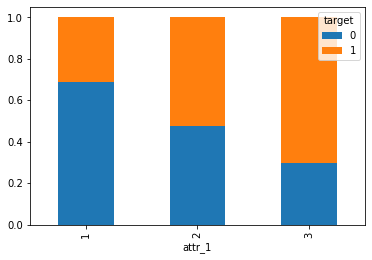

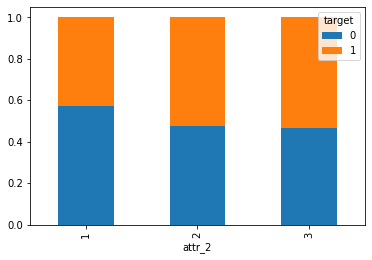

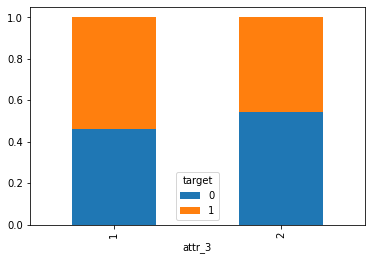

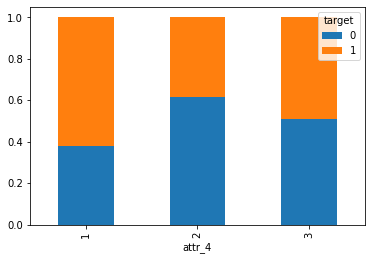

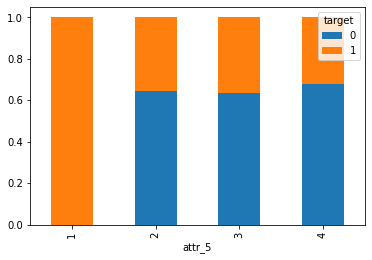

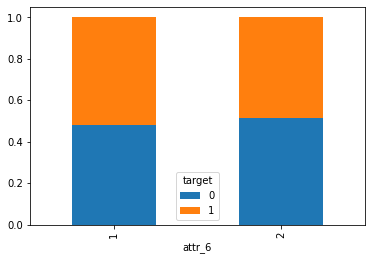

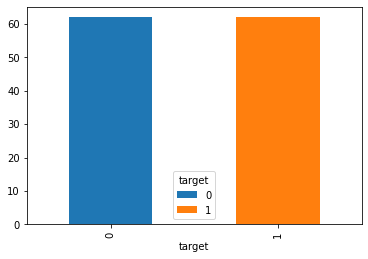

In [27]:
#Describe categorical variable (univariate & multivariate)
target_variable = 'target'
for _ in list(monk1_train):
    ct = pd.crosstab(monk1_train.loc[:,_],monk1_train.loc[:,target_variable])
    if _ == target_variable:
        ct.plot(kind='bar',stacked = True)
    else: 
        temp = ct.div(ct.sum(1).astype(float), axis=0)
        temp.plot(kind='bar',stacked = True)

Monk 2

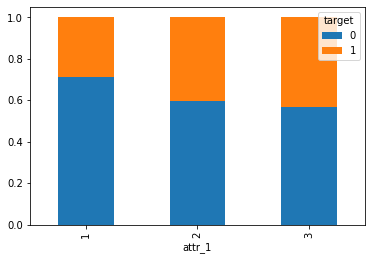

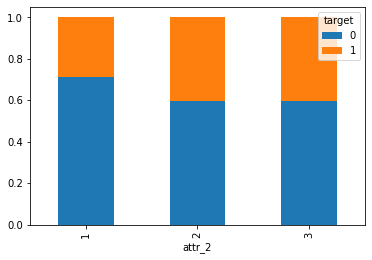

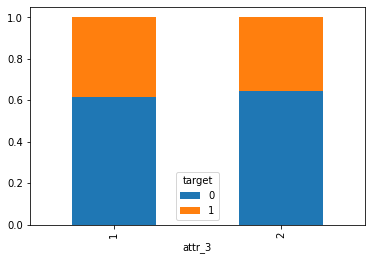

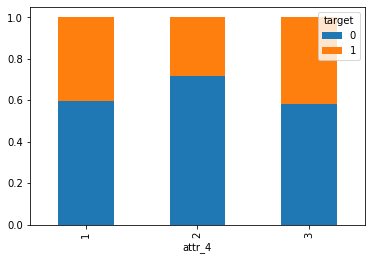

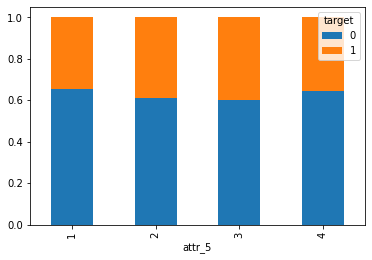

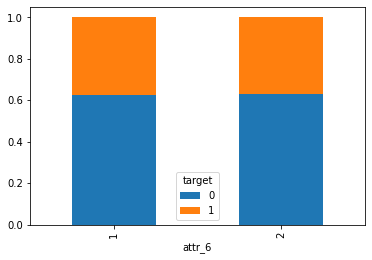

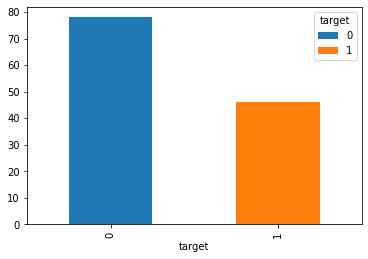

In [29]:
#Describe categorical variable (univariate & multivariate)
target_variable = 'target'
for _ in list(monk2_train):
    ct = pd.crosstab(monk1_train.loc[:,_],monk2_train.loc[:,target_variable])
    if _ == target_variable:
        ct.plot(kind='bar',stacked = True)
    else: 
        temp = ct.div(ct.sum(1).astype(float), axis=0)
        temp.plot(kind='bar',stacked = True)

Monk 3

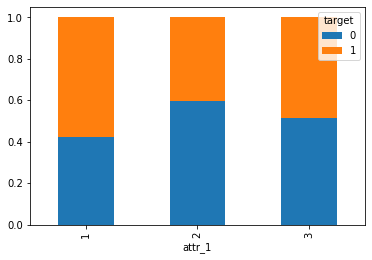

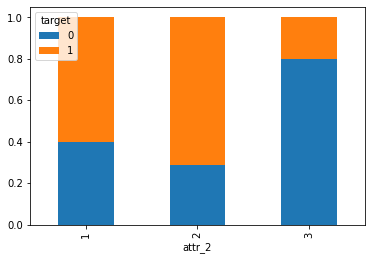

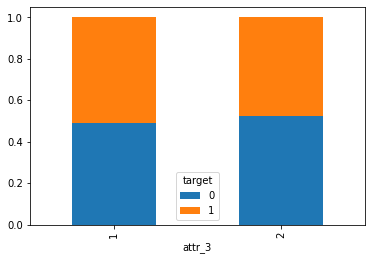

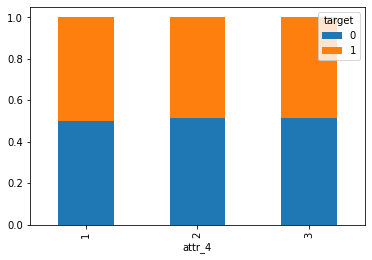

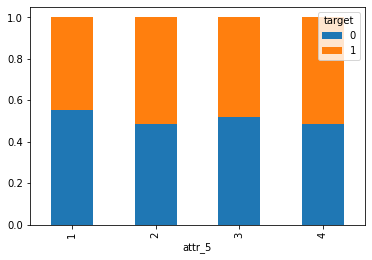

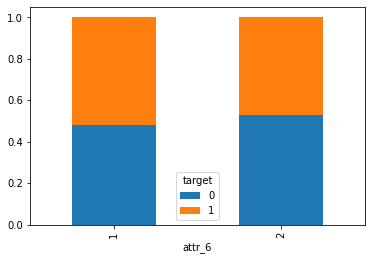

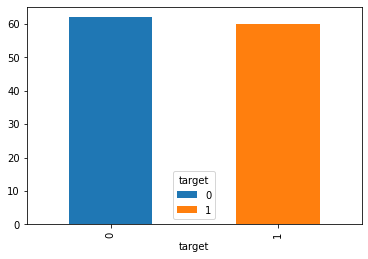

In [31]:
#Describe categorical variable (univariate & multivariate)
target_variable = 'target'
for _ in list(monk3_train):
    ct = pd.crosstab(monk1_train.loc[:,_],monk3_train.loc[:,target_variable])
    if _ == target_variable:
        ct.plot(kind='bar',stacked = True)
    else: 
        temp = ct.div(ct.sum(1).astype(float), axis=0)
        temp.plot(kind='bar',stacked = True)

# MONK1

In [ ]:
monk1_train

attr_1  attr_2  attr_3  attr_4  attr_5  attr_6  target
0         1       1       1       1       3       1       1
1         1       1       1       1       3       2       1
2         1       1       1       3       2       1       1
3         1       1       1       3       3       2       1
4         1       1       2       1       2       1       1
..      ...     ...     ...     ...     ...     ...     ...
119       3       3       2       1       4       2       1
120       3       3       2       3       1       2       1
121       3       3       2       3       2       2       1
122       3       3       2       3       3       2       1
123       3       3       2       3       4       2       1

[124 rows x 7 columns]

In [ ]:
monk1_test

attr_1  attr_2  attr_3  attr_4  attr_5  attr_6  target
0         1       1       1       1       1       1       1
1         1       1       1       1       1       2       1
2         1       1       1       1       2       1       1
3         1       1       1       1       2       2       1
6         1       1       1       1       4       1       1
..      ...     ...     ...     ...     ...     ...     ...
423       3       3       2       2       4       2       1
424       3       3       2       3       1       1       1
426       3       3       2       3       2       1       1
428       3       3       2       3       3       1       1
430       3       3       2       3       4       1       1

[308 rows x 7 columns]

### data partitionning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
monk1_train.iloc[:,:-1]

attr_1  attr_2  attr_3  attr_4  attr_5  attr_6
0         1       1       1       1       3       1
1         1       1       1       1       3       2
2         1       1       1       3       2       1
3         1       1       1       3       3       2
4         1       1       2       1       2       1
..      ...     ...     ...     ...     ...     ...
119       3       3       2       1       4       2
120       3       3       2       3       1       2
121       3       3       2       3       2       2
122       3       3       2       3       3       2
123       3       3       2       3       4       2

[124 rows x 6 columns]

In [ ]:
X = monk1_train.iloc[:,:-1]
y = monk1_train['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

### attribute encoding

In [ ]:
#with sklearn OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = onehot_encoder.fit_transform(monk1_train.iloc[:,:-1])
X_encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.]])

In [ ]:
#with Pandas get_dummies
X_encoded = pd.get_dummies(monk1_train.iloc[:,:-1].astype('str'), prefix_sep='=')

In [ ]:
X_encoded

attr_1=1  attr_1=2  attr_1=3  ...  attr_5=4  attr_6=1  attr_6=2
0           1         0         0  ...         0         1         0
1           1         0         0  ...         0         0         1
2           1         0         0  ...         0         1         0
3           1         0         0  ...         0         0         1
4           1         0         0  ...         0         1         0
..        ...       ...       ...  ...       ...       ...       ...
119         0         0         1  ...         1         0         1
120         0         0         1  ...         0         0         1
121         0         0         1  ...         0         0         1
122         0         0         1  ...         0         0         1
123         0         0         1  ...         1         0         1

[124 rows x 17 columns]

### Decision tree - Monk1

In [ ]:
#first trial to get an idea of the of the fitting capabilities of the model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_test, y_pred))
print('confusion matrix: \n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

train acc. :  1.0
test acc. :  0.8461538461538461
confusion matrix: 
 [[4 2]
 [0 7]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.78      1.00      0.88         7

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
r = {}
for _ in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("average of multiple hold-out validation accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("average of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

[[1.0, 0.923], [1.0, 0.769], [1.0, 1.0], [1.0, 0.846], [1.0, 0.769], [1.0, 0.769], [1.0, 1.0], [1.0, 0.846], [1.0, 1.0], [1.0, 1.0]]
average of multiple hold-out validation accuracy:  1.0
average of multiple hold-out validation accuracy:  0.8627
std of multiple hold-out validation accuracy:  0.1084


from the repeated hold out validation conducted above, we see that the model has a low bias (as it sometimes able to reach 100% validation accuracy, thus showing the representational capability of the model to learn the target function) and high variance as demonstrated by high variation in the validation results.

keeping in mind the very small size of the training set (124 records), the choice of the validation split seems tricky. One one hand we want to maximize the number of training samples in order to get a correct estimation of the model once it will be trained on all the samples, on the other hand we want to have a significant number of records for the validation (as too few records may hugely increase the variance of the validation accuracy and render it unreliable)

In [ ]:
res = {}
for i in range(3,15):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
  scores = cross_val_score(clf, X, y, cv=i)
  res[i] = [round(scores.mean(),3), round(scores.std(),3)]
print(res)

{3: [0.79, 0.18], 4: [0.79, 0.13], 5: [0.748, 0.151], 6: [0.815, 0.143], 7: [0.799, 0.185], 8: [0.809, 0.186], 9: [0.879, 0.161], 10: [0.895, 0.15], 11: [0.894, 0.143], 12: [0.935, 0.101], 13: [0.855, 0.188], 14: [0.863, 0.18]}


we saw that, at first glance, the k of k-fold cross validation seemed to influence the performance of the decision tree. 
We thought that such fluctuation could be due to the fact that by increasing K, we let the model train of more samples and thus by the SLT, allow the model generalize better. 
In order to check our assumptions, we performed a repeated cross validation in order to decrease the variance of the results

In [ ]:
#check one-time k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res1 = {}
for i in range(2,124,1):
  acc_temp = []
  std_temp = []
  for _ in range(1):
    print(f'\n i={i} l={round(len(X)-(len(X)/i))}')
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
    scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True))
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  res1[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]


 i=2 l=62
Accuracy: 0.8226 (+/- 0.16)
F1-score: 0.8841 (+/- 0.23)

 i=3 l=83
Accuracy: 0.8542 (+/- 0.17)
F1-score: 0.8037 (+/- 0.22)

 i=4 l=93
Accuracy: 0.8306 (+/- 0.25)
F1-score: 0.8216 (+/- 0.17)

 i=5 l=99
Accuracy: 0.9030 (+/- 0.07)
F1-score: 0.8161 (+/- 0.23)

 i=6 l=103
Accuracy: 0.8456 (+/- 0.22)
F1-score: 0.8298 (+/- 0.18)

 i=7 l=106
Accuracy: 0.8945 (+/- 0.14)
F1-score: 0.8444 (+/- 0.12)

 i=8 l=108
Accuracy: 0.8245 (+/- 0.18)
F1-score: 0.8512 (+/- 0.14)

 i=9 l=110
Accuracy: 0.8871 (+/- 0.20)
F1-score: 0.7998 (+/- 0.34)

 i=10 l=112
Accuracy: 0.8705 (+/- 0.21)
F1-score: 0.8851 (+/- 0.19)

 i=11 l=113
Accuracy: 0.8382 (+/- 0.25)
F1-score: 0.8829 (+/- 0.19)

 i=12 l=114
Accuracy: 0.8303 (+/- 0.24)
F1-score: 0.8695 (+/- 0.23)

 i=13 l=114
Accuracy: 0.8316 (+/- 0.28)
F1-score: 0.8500 (+/- 0.36)

 i=14 l=115
Accuracy: 0.8472 (+/- 0.18)
F1-score: 0.8383 (+/- 0.29)

 i=15 l=116
Accuracy: 0.8713 (+/- 0.19)
F1-score: 0.8871 (+/- 0.27)

 i=16 l=116
Accuracy: 0.7946 (+/- 0.27)
F1-sc

KeyboardInterrupt: ignored

In [ ]:
plt.plot(list(res1.keys()), [i[1] for i in res1.values()])
plt.ylim([0.7,1])

In [ ]:
#check avererage of 10-times k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res2 = {}
for i in range(2,124,1):
  acc_temp = []
  std_temp = []
  for _ in range(10):
    print(f'\n i={i} l={round(len(X)-(len(X)/i))}')
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
    scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True))
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  res2[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]


In [ ]:
plt.plot(list(res2.keys()), [i[1] for i in res2.values()])
plt.ylim([0.7,1])

In [ ]:
#check avererage of 10-times STRATIFIED k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res3 = {}
for i in range(2,63,1):
  acc_temp = []
  std_temp = []
  for _ in range(10):
    print(f'\n i={i} l={round(len(X)-(len(X)/i))}')
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
    scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=i, random_state=None, shuffle=True))
    print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  res3[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]


In [ ]:
plt.plot(list(res3.keys()), [i[1] for i in res3.values()])
plt.ylim([0.7,1])

From the graphs above we showed that the performance of the classifier is independent from the k of cross validation. Indeed we can see that as long as the classifier can train on more than 50% of the Monk1 training samples (ie with k=2), the validation performance stays average for all the further k folds up until leave-one-out (k = lenght of training samples).

let's try to make it better by looking at the learning curve wrt to complexity

In [ ]:
#creating a control of complexity with 20 value with min_sample_leaf -> start with 1/3 of len(X_train) and reduce to 1
min_leaf_values = list(np.linspace((len(X_train)/3), 1,20, dtype=int))

In [ ]:
#repeating training and validation n times and save outputs to dictionary
r_mean = {}
r_all = {}
l_val = []
for c in range(20):
  temp_mt = []
  temp_mr = []
  for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None)
    #clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                            #n_estimators=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all[c] = [temp_mr, temp_mt]
  r_mean[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


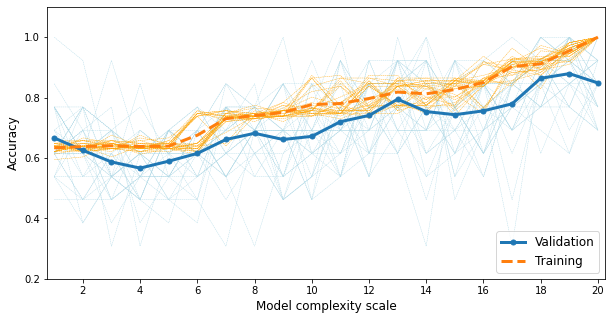

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(list(range(1,21)), [_[1] for _ in r_all.values()], linestyle='dashed', linewidth=0.4, color='lightblue')
plt.plot(list(range(1,21)), [_[0] for _ in r_all.values()], linestyle='dashed', color='orange', linewidth=0.4)
plt.plot(list(range(1,21)), [_[1] for _ in r_mean.values()], label='Validation', marker='o', markersize=5, linewidth=3)
plt.plot(list(range(1,21)), [_[0] for _ in r_mean.values()], label='Training', linestyle='dashed',linewidth=3, )
plt.locator_params(axis='x', nbins=11)
plt.ylim([0.2,1.1])
plt.xlim([0.75,20.25])
plt.xlabel('Model complexity scale', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='lower right', fontsize='large')

variance-bias trade-off in overfitting

due to the very high variance, our assumption is that the model is currently overfitting the training sample. To verify our assumption we will try to sligthly regularize the model to see if we can reduce the variance without increasing the bias. (ie: we want to see if we by regularizing we can obtain a higher average validation accuracy)

We first searched a better generalization by tuning some parameters. However, we realized that, due to the high variance of the model, the classic GridSearch algorithm was not reliable as different runs would provide different results and the returned performance were extremely volatile. Indeed by replicating the best parameters proposed by the GridSearch with a 1000 times repeated 5-fold cross validation, we realized that we needed much more averaged results to possibly compare different hyper-parameters combinations.

In [ ]:
clf = DecisionTreeClassifier()
param_list = {'min_samples_split': list(np.arange(2, 12, 2)),
              'min_samples_leaf': list(np.arange(1, 10, 1)),
              'max_features':  list(np.arange(0.7, 0.9, 0.1))
              }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True))
grid_search.fit(X_encoded, y)
print(grid_search.best_params_)
print(round(pd.DataFrame(grid_search.cv_results_).mean_test_score.max(),3))
#clf = grid_search.best_estimator_
report(grid_search.cv_results_)

In [ ]:
#1000 * 5 fold cross validation with GridSearch best parameters
mean_l = []
for _ in range(1000):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=8, min_samples_leaf=3, max_features=0.7)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print("averaged 1000 cross validated accuracy of GridSearch best parameters: ", round(np.array(mean_l).mean(), 3))

We thus created our own GridSearch style algorithm that would include a 100 random 5-fold cross validations for every hyper parameter combination.  

In [ ]:
params = {'min_samples_split': list(np.arange(2, 6, 2)),
              'min_samples_leaf': list(np.arange(1, 4, 1)),
              'max_features': list(np.arange(0.5, 1, 0.1))+[1]}

In [ ]:
import itertools
params_df = pd.DataFrame(data = list(itertools.product(list(params.values())[0], list(params.values())[1], list(params.values())[2] )), columns=list(params.keys()))
print("number of combinations to try: ", len(params_df))

In [ ]:
def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features):
  mean_l = []
  for _ in range(num_rep):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

for i in params_df.index:
  params_df.loc[i,'mean_accuracy'] = get_average_performance(100, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])


In [ ]:
best_performers_df = params_df.sort_values(by='mean_accuracy', ascending=False).head()
best_performers_df

In [ ]:
for i in best_performers_df.index:
  best_performers_df.loc[i,'mean_accuracy'] = get_average_performance(500, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])

In [ ]:
best_performers_df

In [ ]:
#1000 * 5 fold cross validation with max_features=0.7
#get mean value
mean_l = []
for _ in range(1000):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=0.7)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

checking whether regularization parameter max_features has a significant effect on the validation accuracy

In [ ]:
#1000 * 5 fold cross validation with max_features=0.7
#get mean value
mean_l = []
for _ in range(1000):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=0.7)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

In [ ]:
#1000 * 5 fold cross validation with max_features=None
#get mean value
mean_l = []
for _ in range(1000):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

checking whether regularization parameter max_features has a significant effect on the validation variance

---



In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
#with max_features=0.7
r = {}
for _ in range(10000):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y)
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=0.7)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("mean of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("mean of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
# with max_features=None (ie. no regularization)
r = {}
for _ in range(10000):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("mean of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("mean of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

From the above results we can see that, through a slight regularization of the model, we were able to increase the validation accuracy whilst managing to keep the variance constant. Thus indicating that we were indeed in overfitting and now we should have reached the best possible tuning of our decision tree classifier.

visualization of variance-bias tradeoff for decision tree on Monk1

In [ ]:
maxFeat_dic = dict(zip(list(range(20)),list(np.arange(0.05, 1, 0.05))+[None]))
maxDepth_dic = dict(zip(list(range(20)),list(np.arange(1, 20, 1))+[None]))

In [ ]:
#creating a control of complexity with 20 value with min_sample_leaf -> start with 1/3 of len(X_train) and reduce to 1
min_leaf_values = list(np.linspace((len(X_train)/3), 1,20, dtype=int))

In [ ]:
#repeating training and validation n times and save outputs to dictionary
r_mean = {}
r_all = {}
l_val = []
for c in range(20):
  temp_mt = []
  temp_mr = []
  for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    #clf = DecisionTreeClassifier(criterion='gini', max_depth=maxDepth_dic.get(c), min_samples_split=2, min_samples_leaf=max(1,10-c), max_features=maxFeat_dic.get(c))
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all[c] = [temp_mr, temp_mt]
  r_mean[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(list(range(1,21)), np.array([_[1] for _ in r_all.values()]), linestyle='dashed', linewidth=0.4, color='lightblue' )
plt.plot(list(range(1,21)), np.array([_[0] for _ in r_all.values()]), linestyle='dashed', color='orange', linewidth=0.4)
plt.plot(list(range(1,21)), np.array([_[1] for _ in r_mean.values()]), label='Validation', marker='o', markersize=5, linewidth=3)
plt.plot(list(range(1,21)), np.array([_[0] for _ in r_mean.values()]), label='Training', linestyle='dashed',linewidth=3, )
plt.locator_params(axis='x', nbins=11)
plt.ylim([0.2,1.1])
plt.xlim([0.75,20.25])
plt.xlabel('Model complexity scale', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='lower right', fontsize='large')

we saw that the single decision tree averages 88% accuracy with 10% standard deviation.
Let's try to reduce the variance with an Ensemble method.

### Bagged decision trees

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

let's take the best parameters of decision tree tuned previously and let's bagged it to analyse the mean and variance distribution for various number of estimators for the bagging ensemble

In [ ]:
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)


In [ ]:
#repeating training and validation n times and save outputs to dictionary
r_mean_box = {}
r_all_box = {}
for c in [1,10,25,50,100,500]:
  temp_mt = []
  temp_mr = []
  for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None),
                            n_estimators=c)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all_box[c] = [temp_mr, temp_mt]
  r_mean_box[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


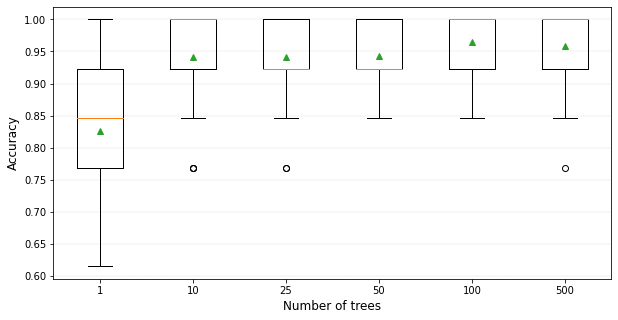

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.boxplot([_[1] for _ in r_all_box.values()], labels=list(r_all_box.keys()), showmeans=True)
plt.grid(color='grey', linestyle='dashed', axis='y', linewidth=0.15)
plt.xlabel('Number of trees', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.show()

from the above we can see that with an Ensemble of around 25 we start having a significant increase in the mean accuracy and reduction in standard dev.

let's try to make it better by looking at the learning curve wrt to complexity

In [ ]:
#creating a control of complexity with 20 value with min_sample_leaf -> start with 1/3 of len(X_train) and reduce to 1
min_leaf_values = list(np.linspace((len(X_train)/3), 1,20, dtype=int))

In [ ]:
#repeating training and validation n times and save outputs to dictionary
r_mean = {}
r_all = {}
l_val = []
for c in range(20):
  temp_mt = []
  temp_mr = []
  for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None)
    #clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                            #n_estimators=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all[c] = [temp_mr, temp_mt]
  r_mean[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


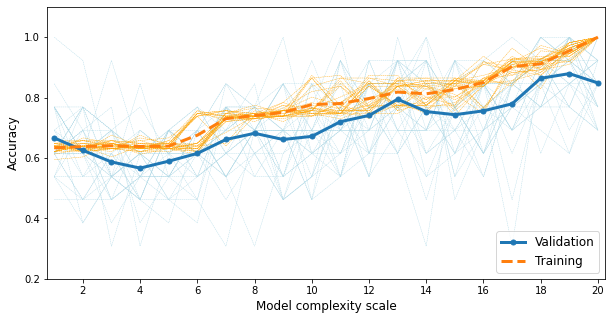

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(list(range(1,21)), [_[1] for _ in r_all.values()], linestyle='dashed', linewidth=0.4, color='lightblue')
plt.plot(list(range(1,21)), [_[0] for _ in r_all.values()], linestyle='dashed', color='orange', linewidth=0.4)
plt.plot(list(range(1,21)), [_[1] for _ in r_mean.values()], label='Validation', marker='o', markersize=5, linewidth=3)
plt.plot(list(range(1,21)), [_[0] for _ in r_mean.values()], label='Training', linestyle='dashed',linewidth=3, )
plt.locator_params(axis='x', nbins=11)
plt.ylim([0.2,1.1])
plt.xlim([0.75,20.25])
plt.xlabel('Model complexity scale', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='lower right', fontsize='large')

plotting learning curve for various n num of trees in enseble

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)

In [ ]:
#creating a control of complexity with 20 value with min_sample_leaf -> start with 1/3 of len(X_train) and reduce to 1
min_leaf_values = list(np.linspace((len(X_train)/3), 1,20, dtype=int))

In [ ]:
min_leaf_values

[37, 35, 33, 31, 29, 27, 25, 23, 21, 19, 18, 16, 14, 12, 10, 8, 6, 4, 2, 1]

In [ ]:
#repeating training and validation n times and save outputs to dictionary
n_est = [5,10,50,100]
d = {}
for est in n_est:
  d[f'r_mean_{est}'] = {}
  d[f'r_all_{est}'] = {}
  for c in range(20):
    temp_mt = []
    temp_mr = []
    for _ in range(30):
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
      #clf = DecisionTreeClassifier(criterion='gini', max_depth=maxDepth_dic.get(c), min_samples_split=2, min_samples_leaf=1, max_features=maxFeat_dic.get(c))
      clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                              n_estimators=est)
      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_tr = clf.predict(X_train)
      temp_mt.append(round(accuracy_score(y_test, y_pred),3))
      temp_mr.append(accuracy_score(y_train, y_pred_tr))
    d[f'r_all_{est}'][c] = [temp_mr, temp_mt]
    d[f'r_mean_{est}'][c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]
d_bagging = d.copy()

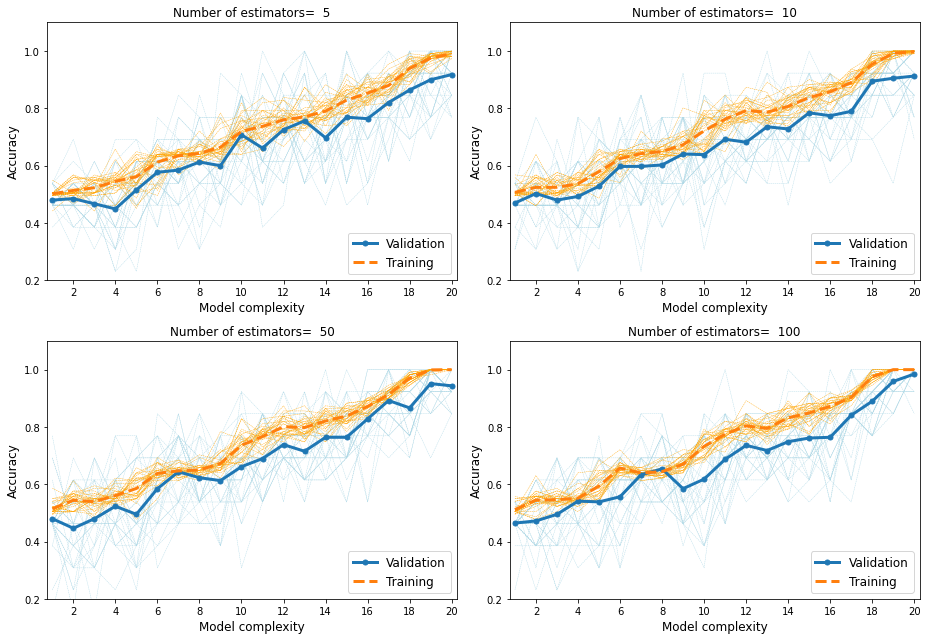

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(13,9))
for est, n, n1 in zip(n_est, [0,0,1,1], [0,1,0,1]):
  plt.sca(ax[n,n1])
  plt.plot(list(range(1,21)), [_[1] for _ in d_bagging[f'r_all_{est}'].values()], linestyle='dashed', linewidth=0.4, color='lightblue' )
  plt.plot(list(range(1,21)), [_[0] for _ in d_bagging[f'r_all_{est}'].values()], linestyle='dashed', color='orange', linewidth=0.4)
  plt.plot(list(range(1,21)), [_[1] for _ in d_bagging[f'r_mean_{est}'].values()], label='Validation', marker='o', markersize=5, linewidth=3)
  plt.plot(list(range(1,21)), [_[0] for _ in d_bagging[f'r_mean_{est}'].values()], label='Training', linestyle='dashed',linewidth=3, )
  plt.locator_params(axis='x', nbins=11)
  plt.ylim([0.2,1.1])
  plt.xlim([0.75,20.25])
  plt.xlabel('Model complexity', fontsize='large')
  plt.ylabel('Accuracy', fontsize='large')
  plt.legend(loc='lower right', fontsize='large')
  plt.title(f'Number of estimators=  {est}')
plt.tight_layout()
plt.show()

In [ ]:
def wrapper(func, args):
    return func(*args)

def create_combination_df():
  global params_df, previous_best
  params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
  params_df = params_df.where(pd.notnull(params_df), None)
  params_df['mean_accuracy'] = None
  print("# of initial combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))
  previous_best = 0

def update_combination_df():
  global params_df
  params_df = pd.concat([params_df, pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))], axis=0, ignore_index=True)
  params_df = params_df.where(pd.notnull(params_df), None)
  print("# of new combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def previous_accuracy_higher_than_new(new_best_result):
  global previous_best
  if previous_best >= new_best_result:
      print('Stopping search because no improvements','\nprevious_best = ',previous_best, '\nnew_best = ',new_best_result)
      previous_best = new_best_result 
      return True
  else:
      if previous_best != 0: print(f'Continuing search: new_best ({new_best_result}) vs previous_best ({previous_best} = {round(((new_best_result-previous_best)/previous_best)*100,3)}')
      previous_best = new_best_result
      return False 

def update_parameters(percentage_update):
    global params
    up, low = 1+1*(percentage_update/100), 1-1*(percentage_update/100)
    key_list = list(advanced_search.keys())
    for key in list(params.keys()):
        if key in key_list:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            if advanced_search[key][1] == 'int':
                try: advanced_search[key][2] == 'min=2'
                except IndexError: min_value = 1
                else: min_value = 2
                finally: 
                        params[key] = [int(round(max(best_param_value-max(best_param_value*(percentage_update/100),1), min_value))) , int(round(max(best_param_value+max(best_param_value*(percentage_update/100),1), min_value)))]                        
                        #params[key] = [int(max(best_param_value*low, min_value)), int(max(best_param_value*up, min_value))]
            elif advanced_search[key][1] == 'float':
                params[key] = [best_param_value*low, best_param_value*up]
        else:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [best_param_value]
    update_combination_df()

def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features), 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), error_score='raise')
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

def launch_search(crossval_repetitions=3):
  global params_df, temp_index
  print('# of crossval_repetitions: ', crossval_repetitions)
  temp_index = params_df.loc[params_df.mean_accuracy.isna()].index
  for i in temp_index:
    try:
      #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
      params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([crossval_repetitions]+ [params_df.loc[i,_] for _ in list(params.keys())])) 
      params_df.loc[i,'#crossval_repetitions'] = int(crossval_repetitions)
      print(dict(params_df.loc[i,[_ for _ in list(params_df) if _ != '#crossval_repetitions']]))
    except ValueError as E:
      print(f'skipped combination {i}:', E)
      pass  

In [ ]:
params = {'min_samples_split': [2,4],
              'min_samples_leaf': [2],
              'max_features': [None],
              'n_estimators': [80]}
advanced_search = {'n_estimators':[30, 'int'], 'min_samples_leaf':[20,'int']}

create_combination_df()
for loop in range(10):
  print(f'loop {loop}')
  launch_search(crossval_repetitions=min(5+(loop*2),10))
  if previous_accuracy_higher_than_new(params_df.loc[temp_index,'mean_accuracy'].max()): 
    break
  else:
    update_parameters(percentage_update=30-(loop*2))


In [ ]:
best_performers_df = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().copy()
best_performers_df

### RandomForest

plotting for Random Forest

In [ ]:
#repeating training and validation n times and save outputs to dictionary
n_est = [5,10,50,100]
d = {}
for est in n_est:
  d[f'r_mean_{est}'] = {}
  d[f'r_all_{est}'] = {}
  for c in range(20):
    temp_mt = []
    temp_mr = []
    for _ in range(30):
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
      clf = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None, 
                              n_estimators=est)
      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_tr = clf.predict(X_train)
      temp_mt.append(round(accuracy_score(y_test, y_pred),3))
      temp_mr.append(accuracy_score(y_train, y_pred_tr))
    d[f'r_all_{est}'][c] = [temp_mr, temp_mt]
    d[f'r_mean_{est}'][c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]
d_forest = d.copy()

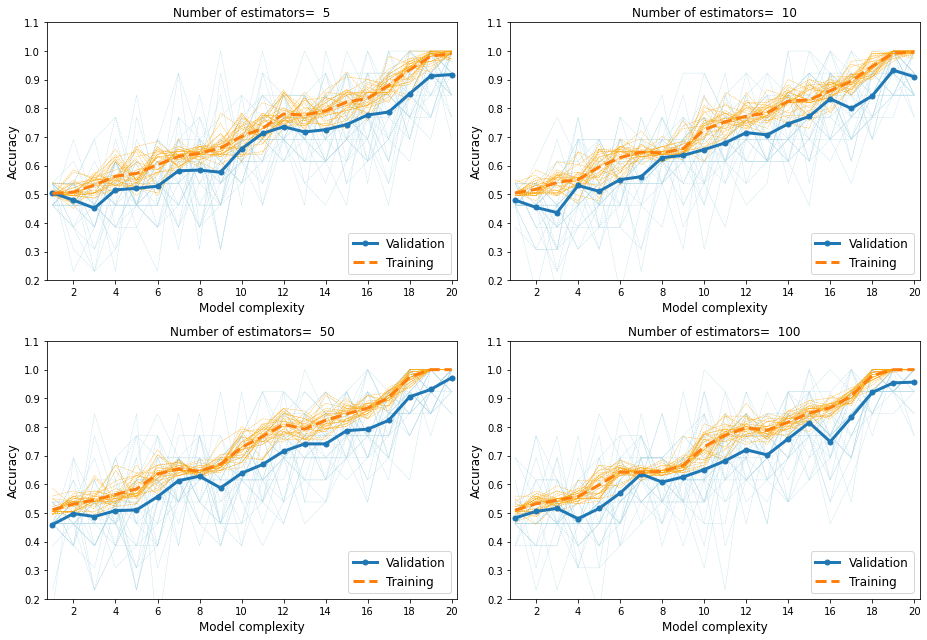

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(13,9))
for est, n, n1 in zip(n_est, [0,0,1,1], [0,1,0,1]):
  plt.sca(ax[n,n1])
  plt.plot(list(range(1,21)), [_[1] for _ in d_forest[f'r_all_{est}'].values()], linestyle='dashed', linewidth=0.4, color='lightblue' )
  plt.plot(list(range(1,21)), [_[0] for _ in d_forest[f'r_all_{est}'].values()], linestyle='dashed', color='orange', linewidth=0.4)
  plt.plot(list(range(1,21)), [_[1] for _ in d_forest[f'r_mean_{est}'].values()], label='Validation', marker='o', markersize=5, linewidth=3)
  plt.plot(list(range(1,21)), [_[0] for _ in d_forest[f'r_mean_{est}'].values()], label='Training', linestyle='dashed',linewidth=3, )
  plt.locator_params(axis='x', nbins=11)
  plt.ylim([0.2,1.1])
  plt.xlim([0.75,20.25])
  plt.xlabel('Model complexity', fontsize='large')
  plt.ylabel('Accuracy', fontsize='large')
  plt.legend(loc='lower right', fontsize='large')
  plt.title(f'Number of estimators=  {est}')
plt.tight_layout()
plt.show()

In [ ]:
def wrapper(func, args):
    return func(*args)

def create_combination_df():
  global params_df, previous_best
  params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
  params_df = params_df.where(pd.notnull(params_df), None)
  params_df['mean_accuracy'] = None
  print("# of initial combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))
  previous_best = 0

def update_combination_df():
  global params_df
  params_df = pd.concat([params_df, pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))], axis=0, ignore_index=True)
  params_df = params_df.where(pd.notnull(params_df), None)
  print("# of new combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def previous_accuracy_higher_than_new(new_best_result):
  global previous_best
  if previous_best >= new_best_result:
      print('Stopping search because no improvements','\nprevious_best = ',previous_best, '\nnew_best = ',new_best_result)
      previous_best = new_best_result 
      return True
  else:
      if previous_best != 0: print(f'Continuing search: new_best ({new_best_result}) vs previous_best ({previous_best} = {round(((new_best_result-previous_best)/previous_best)*100,3)}')
      previous_best = new_best_result
      return False 

def update_parameters(percentage_update):
    global params
    up, low = 1+1*(percentage_update/100), 1-1*(percentage_update/100)
    key_list = list(advanced_search.keys())
    for key in list(params.keys()):
        if key in key_list:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            if advanced_search[key][1] == 'int':
                try: advanced_search[key][2] == 'min=2'
                except IndexError: min_value = 1
                else: min_value = 2
                finally: 
                        params[key] = [int(round(max(best_param_value-max(best_param_value*(percentage_update/100),1), min_value))) , int(round(max(best_param_value+max(best_param_value*(percentage_update/100),1), min_value)))]                        
                        #params[key] = [int(max(best_param_value*low, min_value)), int(max(best_param_value*up, min_value))]
            elif advanced_search[key][1] == 'float':
                params[key] = [best_param_value*low, best_param_value*up]
        else:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [best_param_value]
    update_combination_df()

def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features, 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), error_score='raise')
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

def launch_search(crossval_repetitions=3):
  global params_df, temp_index
  print('# of crossval_repetitions: ', crossval_repetitions)
  temp_index = params_df.loc[params_df.mean_accuracy.isna()].index
  for i in temp_index:
    try:
      #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
      params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([crossval_repetitions]+ [params_df.loc[i,_] for _ in list(params.keys())])) 
      params_df.loc[i,'#crossval_repetitions'] = int(crossval_repetitions)
      print(dict(params_df.loc[i,[_ for _ in list(params_df) if _ != '#crossval_repetitions']]))
    except ValueError as E:
      print(f'skipped combination {i}:', E)
      pass  

In [ ]:
params = {'min_samples_split': [2,4],
              'min_samples_leaf': [2],
              'max_features': [None],
              'n_estimators': [40]}
advanced_search = {'n_estimators':[30, 'int'], 'min_samples_leaf':[20,'int']}

create_combination_df()
for loop in range(10):
  print(f'loop {loop}')
  launch_search(crossval_repetitions=min(5+(loop*2),10))
  if previous_accuracy_higher_than_new(params_df.loc[temp_index,'mean_accuracy'].max()):
    break
  else:
    update_parameters(percentage_update=30-(loop*2))


In [ ]:
best_performers_df = params_df.sort_values(by=['mean_accuracy','#crossval_repetitions'], ascending=False).reset_index().copy()
best_performers_df

### AdaBoost

plotting for AdaBoost

In [37]:
#repeating training and validation n times and save outputs to dictionary
n_est = [5,10,50,100]
d = {}
for est in n_est:
  d[f'r_mean_{est}'] = {}
  d[f'r_all_{est}'] = {}
  for c in range(20):
    temp_mt = []
    temp_mr = []
    for _ in range(30):
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
      #clf = DecisionTreeClassifier(criterion='gini', max_depth=maxDepth_dic.get(c), min_samples_split=2, min_samples_leaf=1, max_features=maxFeat_dic.get(c))
      clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                              n_estimators=est)
      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_tr = clf.predict(X_train)
      temp_mt.append(round(accuracy_score(y_test, y_pred),3))
      temp_mr.append(accuracy_score(y_train, y_pred_tr))
    d[f'r_all_{est}'][c] = [temp_mr, temp_mt]
    d[f'r_mean_{est}'][c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]
d_ada = d.copy()

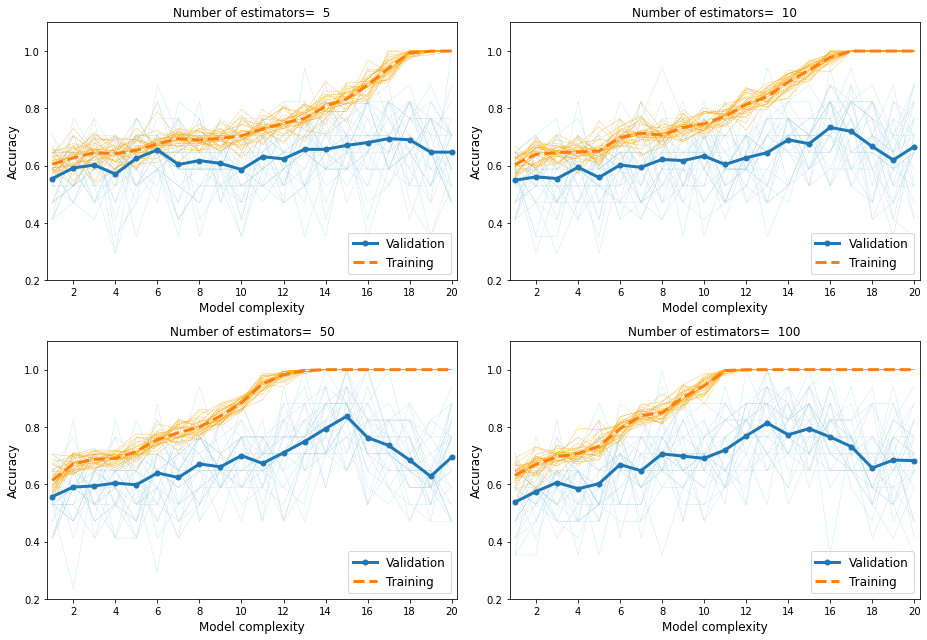

In [38]:
fig, ax = plt.subplots(2,2,figsize=(13,9))
for est, n, n1 in zip(n_est, [0,0,1,1], [0,1,0,1]):
  plt.sca(ax[n,n1])
  plt.plot(list(range(1,21)), [_[1] for _ in d_ada[f'r_all_{est}'].values()], linestyle='dashed', linewidth=0.4, color='lightblue' )
  plt.plot(list(range(1,21)), [_[0] for _ in d_ada[f'r_all_{est}'].values()], linestyle='dashed', color='orange', linewidth=0.4)
  plt.plot(list(range(1,21)), [_[1] for _ in d_ada[f'r_mean_{est}'].values()], label='Validation', marker='o', markersize=5, linewidth=3)
  plt.plot(list(range(1,21)), [_[0] for _ in d_ada[f'r_mean_{est}'].values()], label='Training', linestyle='dashed',linewidth=3, )
  plt.locator_params(axis='x', nbins=11)
  plt.ylim([0.2,1.1])
  plt.xlim([0.75,20.25])
  plt.xlabel('Model complexity', fontsize='large')
  plt.ylabel('Accuracy', fontsize='large')
  plt.legend(loc='lower right', fontsize='large')
  plt.title(f'Number of estimators=  {est}')
plt.tight_layout()
plt.show()

In [ ]:
def wrapper(func, args):
    return func(*args)

def create_combination_df():
  global params_df, previous_best
  params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
  params_df = params_df.where(pd.notnull(params_df), None)
  params_df['mean_accuracy'] = None
  print("# of initial combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))
  previous_best = 0

def update_combination_df():
  global params_df
  params_df = pd.concat([params_df, pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))], axis=0, ignore_index=True)
  params_df = params_df.where(pd.notnull(params_df), None)
  print("# of new combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def previous_accuracy_higher_than_new(new_best_result):
  global previous_best
  if previous_best >= new_best_result:
      print('Stopping search because no improvements','\nprevious_best = ',previous_best, '\nnew_best = ',new_best_result)
      previous_best = new_best_result 
      return True
  else:
      if previous_best != 0: print(f'Continuing search: new_best ({new_best_result}) vs previous_best ({previous_best} = {round(((new_best_result-previous_best)/previous_best)*100,3)}')
      previous_best = new_best_result
      return False 

def get_type(par, val):
  if advanced_search[par][1] == 'int': return int(val)
  if advanced_search[par][1] == 'float': return float(val)

def update_parameters(percentage_update):
    global params
    up, low = 1+1*(percentage_update/100), 1-1*(percentage_update/100)
    key_list = list(advanced_search.keys())
    for key in list(params.keys()):
        if key in key_list:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [get_type(key, best_param_value*low) , get_type(key, best_param_value*up)]
        else:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [best_param_value]
    update_combination_df()

def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features), 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), error_score='raise')
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

def launch_search(crossval_repetitions=3):
  global params_df, temp_index
  print('# of crossval_repetitions: ', crossval_repetitions)
  temp_index = params_df.loc[params_df.mean_accuracy.isna()].index
  for i in temp_index:
    try:
      #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
      params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([crossval_repetitions]+ [params_df.loc[i,_] for _ in list(params.keys())])) 
      params_df.loc[i,'#crossval_repetitions'] = int(crossval_repetitions)
      print(dict(params_df.loc[i,[_ for _ in list(params_df) if _ != '#crossval_repetitions']]))
    except ValueError as E:
      print(f'skipped combination {i}:', E)
      pass  

In [ ]:
params = {'min_samples_split': [25],
              'min_samples_leaf': [25],
              'max_features': [None],
              'n_estimators': [15]}
advanced_search = {'n_estimators':[30, 'int'], 'min_samples_split':[20, 'int'], 'min_samples_leaf':[20,'int']}

create_combination_df()
for loop in range(10):
  print(f'loop {loop}')
  launch_search(crossval_repetitions=8+(loop*2))
  if previous_accuracy_higher_than_new(params_df.loc[temp_index,'mean_accuracy'].max()): 
    break
  else:
    update_parameters(percentage_update=20-(loop*2))


In [ ]:
best_performers_df = params_df.sort_values(by=['mean_accuracy','#crossval_repetitions'], ascending=False).reset_index().copy()
best_performers_df

##### why do we use CV=10?
let's check the effect of number of CV on accuracy.
A comparison between single decision tree and ensemble

In [ ]:
#Ensemble
#check avererage of 10-times k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res_comp_ensemble = {}
for i in range(2,20,1):
  acc_temp = []
  std_temp = []
  for _ in range(10):
    print(f'\n i={i} l={round(len(X)-(len(X)/i))}')
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=0.7),
                            n_estimators=25)
    scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  res_comp_ensemble[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]


(0.7, 1.0)

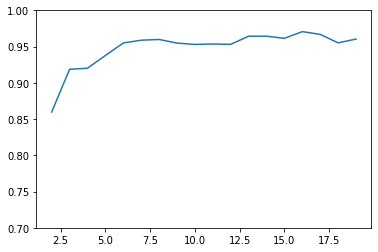

In [ ]:
plt.plot(list(res_comp_ensemble.keys()), [i[1] for i in res_comp_ensemble.values()])
plt.ylim([0.7,1])

In [ ]:
#Single decision tree
#check avererage of 10-times k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res_comp_dectree = {}
for i in range(2,20,1):
  acc_temp = []
  std_temp = []
  for _ in range(10):
    #print(f'\n i={i} l={round(len(X)-(len(X)/i))}')
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
    scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  res_comp_dectree[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]


(0.7, 1.0)

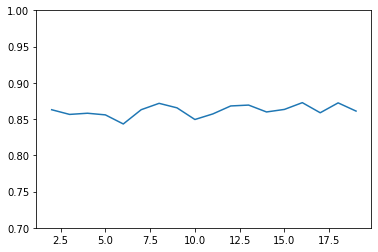

In [ ]:
plt.plot(list(res_comp_dectree.keys()), [i[1] for i in res_comp_dectree.values()])
plt.ylim([0.7,1])

from the above we can see that the ensemble needs more data to start performing well compared to the single decision tree. This shows ?
- the higher expressiveness capabilities of the ensemble ?

We will thus continue using the Ensamble with CV = 10 k fold

In [ ]:
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(100):
  clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=25)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

0.9515705128205129


##### comparison between max_features=0.7 inside the decision trees and max_features=0.7 inside the bagging algorithm

In [ ]:
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(100):
  clf = BaggingClassifier(DecisionTreeClassifier(max_features=0.7), n_estimators=25)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

0.9571089743589742


In [ ]:
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(100):
  clf = BaggingClassifier(DecisionTreeClassifier(), max_features=0.7, n_estimators=25)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

0.922826923076923


##### gridsearch of best parameters for bagged decision trees

In [ ]:
import itertools

In [ ]:
def wrapper(func, args):
    return func(*args)

In [ ]:
import itertools
params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
params_df = params_df.where(pd.notnull(params_df), None)
print("number of combinations to try: ", len(params_df))


number of combinations to try:  8


In [ ]:
def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features), 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

for i in params_df.index:
  #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
  params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([3]+ [params_df.loc[i,_] for _ in list(params.keys())]))


In [ ]:
del previous_best

In [ ]:
params = {'min_samples_split': [2,4,6],
              'min_samples_leaf': [1,2,3,4,5],
              'max_features': [None,0.9,0.8,0.7],
              'n_estimators': [200, 400, 600]}
advanced_search = {'n_estimators':[30, 'int']}

In [ ]:
def wrapper(func, args):
    return func(*args)

def create_combination_df():
  global params_df
  params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
  params_df = params_df.where(pd.notnull(params_df), None)
  params_df['mean_accuracy'] = None
  print("number of combinations to try: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def update_combination_df():
  global params_df
  params_df = pd.concat([params_df, pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))], axis=0, ignore_index=True)
  params_df = params_df.where(pd.notnull(params_df), None)
  print("number of combinations to try: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def previous_accuracy_higher_than_new(bre):
  global previous_best
  try: previous_best
  except NameError: pass
  else: 
    if previous_best*1.005 >= bre:
      print('previous_best = ',previous_best)
      print('new_best = ',bre)
      previous_best = bre 
      return True
  previous_best = bre
  return False 

def get_type(par, val):
  if advanced_search[par][1] == 'int': return int(val)
  if advanced_search[par][1] == 'float': return float(val)

def update_parameters(percentage_update):
  global params
  up, low = 1+1*(percentage_update/100), 1-1*(percentage_update/100)
  key_list = list(advanced_search.keys())
  for k in range(len(key_list)):
    best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key_list[k]]
    params[key_list[k]] = [get_type( key_list[k], best_param_value*low) , get_type(key_list[k], best_param_value*up)]
  update_combination_df()

def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features), 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), error_score='raise')
    print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

def launch_search(crossval_repetitions=3):
  global params_df, temp_index
  temp_index = params_df.loc[params_df.mean_accuracy.isna()].index
  for i in params_df.loc[params_df.mean_accuracy.isna()].index:
    try:
    #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
      params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([crossval_repetitions]+ [params_df.loc[i,_] for _ in list(params.keys())])) 
    except ValueError as E:
      print(f'skipped combination {i}:', E)
      pass  


create_combination_df()
for loop in range(50):
  launch_search(5)
  if previous_accuracy_higher_than_new(params_df.loc[temp_index,'mean_accuracy'].max()): 
    break
  else:
    update_parameters(percentage_update=50-loop)


In [ ]:
best_performers_df = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().copy()
best_performers_df

index  min_samples_split  ...  n_estimators mean_accuracy
0      3                  2  ...           300      0.975641
1      0                  2  ...           200      0.967949
2      1                  2  ...           500      0.958974
3      2                  2  ...           100      0.942949

[4 rows x 6 columns]

testing GridSearch best results

In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
r = {}
for _ in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2, max_features=0.8), n_estimators=200)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("average of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("average of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

[[1.0, 0.923], [1.0, 0.923], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 0.923], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]
average of training accuracy:  1.0
average of validation accuracy:  0.9754
std of multiple hold-out validation accuracy:  0.0473


In [ ]:
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(5):
  clf = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2, max_features=0.8), n_estimators=200)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), n_jobs=-1)
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

0.9744871794871794


we can clearly see the positive effect of the bagged decision trees.
- decision tree: 88% accuracy and 10% std
- bagged decision trees: 95% and 6% std

visualization of variance-bias tradeoff for BAGGED decision tree on Monk1

In [ ]:
maxFeat_dic = dict(zip(list(range(20)),list(np.arange(0.05, 1, 0.05))+[None]))
maxDepth_dic = dict(zip(list(range(20)),list(np.arange(1, 20, 1))+[None]))

In [ ]:
#repeating training and validation n times and save outputs to dictionary
r_mean = {}
r_all = {}
l_val = []
for c in range(20):
  temp_mt = []
  temp_mr = []
  for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, stratify=y)
    #clf = DecisionTreeClassifier(criterion='gini', max_depth=maxDepth_dic.get(c), min_samples_split=2, min_samples_leaf=1, max_features=maxFeat_dic.get(c))
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=maxDepth_dic.get(c), min_samples_split=2, min_samples_leaf=1, max_features=maxFeat_dic.get(c)),
                            n_estimators=35)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all[c] = [temp_mr, temp_mt]
  r_mean[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


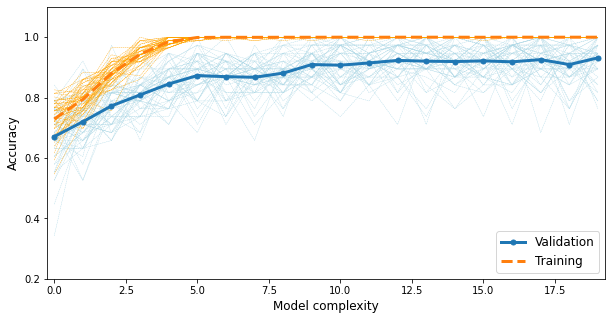

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(list(r_all.keys()), [_[1] for _ in r_all.values()], linestyle='dashed', linewidth=0.4, color='lightblue' )
plt.plot(list(r_all.keys()), [_[0] for _ in r_all.values()], linestyle='dashed', color='orange', linewidth=0.4)
plt.plot(list(r_mean.keys()), [_[1] for _ in r_mean.values()], label='Validation', marker='o', markersize=5, linewidth=3)
plt.plot(list(r_mean.keys()), [_[0] for _ in r_mean.values()], label='Training', linestyle='dashed',linewidth=3, )
plt.ylim([0.2,1.1])
plt.xlim([-0.25,19.25])
plt.xlabel('Model complexity', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='lower right', fontsize='large')

we can see how ensembling the decision trees provided a much lower variance

##### Trying RandomForest algortithm

In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
r = {}
for _ in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = RandomForestClassifier(n_estimators = 500, min_samples_leaf=1, min_samples_split=2, max_depth=None, max_features=None, max_samples=None)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("average of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("average of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

[None, None, None, None, None, None, None, None, None, None]
average of training accuracy:  1.0
average of validation accuracy:  0.9384
std of multiple hold-out validation accuracy:  0.0671


##### AdaBoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#repeating experiment n times to get an idea of variance and avr performance
r = {}
for _ in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=8), n_estimators=500)

  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("average of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("average of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

[None, [1.0, 1.0], None, [1.0, 1.0], None, None, None, None, None, None]
average of training accuracy:  1.0
average of validation accuracy:  1.0
std of multiple hold-out validation accuracy:  0.0


In [ ]:
#repeating training and validation n times and save outputs to dictionary
r_mean_box = {}
r_all_box = {}
for c in [1,2,5,7,10,20,50]:
  temp_mt = []
  temp_mr = []
  for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=20, min_samples_leaf=1, max_features=0.7),
                            n_estimators=c)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all_box[c] = [temp_mr, temp_mt]
  r_mean_box[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


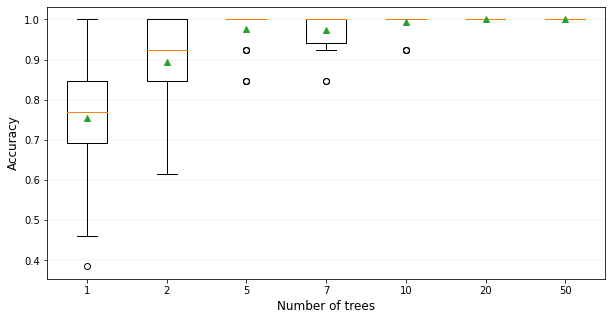

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.boxplot([_[1] for _ in r_all_box.values()], labels=list(r_all_box.keys()), showmeans=True)
plt.grid(color='grey', linestyle='dashed', axis='y', linewidth=0.15)
plt.xlabel('Number of trees', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.show()

In [ ]:
%timeit
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(10):
  clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=16), n_estimators=50)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), n_jobs=-1)
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

0.9984615384615385


In [ ]:
def wrapper(func, args):
    return func(*args)

In [ ]:
params = {'min_samples_split': [2, 8, 16],
              'min_samples_leaf': [1,10,20],
              'max_features': [None, 0.5,0.9],
              'n_estimators': [50, 200, 500]}

In [ ]:
import itertools
params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
params_df = params_df.where(pd.notnull(params_df), None)
print("number of combinations to try: ", len(params_df))

number of combinations to try:  81


In [ ]:
def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features), 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

for i in params_df.index:
  #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
  params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([3]+ [params_df.loc[i,_] for _ in list(params.keys())]))


In [ ]:
pd.set_option('display.max_rows',100)

In [ ]:
best_performers_df = params_df.sort_values(by='mean_accuracy', ascending=False)
best_performers_df

min_samples_split  min_samples_leaf  ... n_estimators  mean_accuracy
40                  8                10  ...          200       1.000000
50                  8                20  ...          500       1.000000
59                 16                 1  ...          500       1.000000
56                 16                 1  ...          500       1.000000
55                 16                 1  ...          200       1.000000
54                 16                 1  ...           50       1.000000
53                  8                20  ...          500       1.000000
52                  8                20  ...          200       1.000000
51                  8                20  ...           50       1.000000
49                  8                20  ...          200       1.000000
61                 16                 1  ...          200       1.000000
48                  8                20  ...           50       1.000000
47                  8                20  ...          500       1.000000
46                  8                20  ...          200       1.000000
45                  8                20  ...           50       1.000000
44                  8                10  ...          500       1.000000
43                  8                10  ...          200       1.000000
42                  8                10  ...           50       1.000000
60                 16                 1  ...           50       1.000000
62                 16                 1  ...          500       1.000000
39                  8                10  ...           50       1.000000
72                 16                20  ...           50       1.000000
79                 16                20  ...          200       1.000000
78                 16                20  ...           50       1.000000
77                 16                20  ...          500       1.000000
76                 16                20  ...          200       1.000000
75                 16                20  ...           50       1.000000
74                 16                20  ...          500       1.000000
73                 16                20  ...          200       1.000000
71                 16                10  ...          500       1.000000
63                 16                10  ...           50       1.000000
70                 16                10  ...          200       1.000000
69                 16                10  ...           50       1.000000
68                 16                10  ...          500       1.000000
67                 16                10  ...          200       1.000000
66                 16                10  ...           50       1.000000
65                 16                10  ...          500       1.000000
64                 16                10  ...          200       1.000000
41                  8                10  ...          500       1.000000
80                 16                20  ...          500       1.000000
21                  2                20  ...           50       1.000000
18                  2                20  ...           50       1.000000
20                  2                20  ...          500       1.000000
38                  8                10  ...          500       1.000000
22                  2                20  ...          200       1.000000
17                  2                10  ...          500       1.000000
23                  2                20  ...          500       1.000000
24                  2                20  ...           50       1.000000
25                  2                20  ...          200       1.000000
26                  2                20  ...          500       1.000000
16                  2                10  ...          200       1.000000
15                  2                10  ...           50       1.000000
14                  2                10  ...          500       1.000000
13                  2                10  ...          200     

In [ ]:
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(5):
  clf = RandomForestClassifier(n_estimators = 500, max_features=None, max_samples=None, n_jobs=-1)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), n_jobs=-1)
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

0.9648717948717949


In [ ]:
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(5):
  clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=8), n_estimators=500)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), n_jobs=-1)
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

1.0


In [ ]:
clf = AdaBoostClassifier(DecisionTreeClassifier())
param_list = {'min_samples_leaf': [2, 6, 10],
              'min_samples_split': [2, 8, 16],
              'max_depth': [None, 3, 6, 9],
              'max_features': [None],
              'n_estimators': [500],
              'max_samples':  [None],
              }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True))
grid_search.fit(X_encoded, y)
print(grid_search.best_params_)
print(round(pd.DataFrame(grid_search.cv_results_).mean_test_score.max(),3))
#clf = grid_search.best_estimator_
report(grid_search.cv_results_)

ValueError: ignored

In [ ]:
clf = RandomForestClassifier()
param_list = {'n_estimators': list(np.arange(200, 800, 200)),
              'max_features': list(np.arange(0.7, 0.9, 0.1))+[None],
              #'max_samples':  None
              }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True))
grid_search.fit(X_encoded, y)
print(grid_search.best_params_)
print(round(pd.DataFrame(grid_search.cv_results_).mean_test_score.max(),3))
#clf = grid_search.best_estimator_
report(grid_search.cv_results_)

{'max_features': 0.8999999999999999, 'n_estimators': 200}
0.983
Model with rank: 1
Mean validation score: 0.983 (std: 0.033)
Parameters: {'max_features': 0.8999999999999999, 'n_estimators': 200}

Model with rank: 1
Mean validation score: 0.983 (std: 0.033)
Parameters: {'max_features': None, 'n_estimators': 400}

Model with rank: 3
Mean validation score: 0.975 (std: 0.038)
Parameters: {'max_features': 0.7, 'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.975 (std: 0.038)
Parameters: {'max_features': 0.7, 'n_estimators': 400}

Model with rank: 3
Mean validation score: 0.975 (std: 0.038)
Parameters: {'max_features': 0.7, 'n_estimators': 600}

Model with rank: 3
Mean validation score: 0.975 (std: 0.038)
Parameters: {'max_features': 0.7999999999999999, 'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.975 (std: 0.038)
Parameters: {'max_features': 0.7999999999999999, 'n_estimators': 400}

Model with rank: 3
Mean validation score: 0.975 (std: 0.038)
Parameters

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
6        0.264139      0.006903  ...        0.033333                1
10       0.515853      0.006121  ...        0.033333                1
0        0.267307      0.010001  ...        0.038188                3
1        0.519599      0.013647  ...        0.038188                3
2        0.779410      0.011761  ...        0.038188                3

[5 rows x 20 columns]

In [ ]:
#repeating training and validation n times and save outputs to dictionary
r_mean_box = {}
r_all_box = {}
for c in [1,5,10,25,50,100,500, 1000, 2000]:
  temp_mt = []
  temp_mr = []
  for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=0.7),
                            n_estimators=c)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all_box[c] = [temp_mr, temp_mt]
  r_mean_box[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


KeyboardInterrupt: ignored

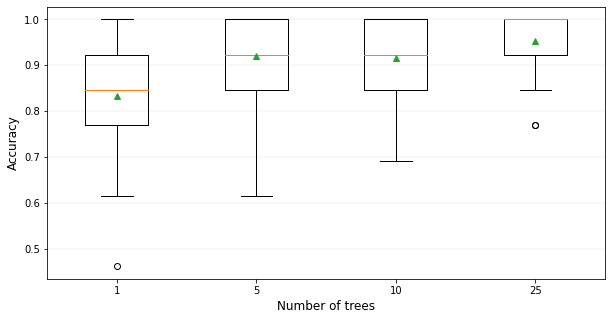

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.boxplot([_[1] for _ in r_all_box.values()], labels=list(r_all_box.keys()), showmeans=True)
plt.grid(color='grey', linestyle='dashed', axis='y', linewidth=0.15)
plt.xlabel('Number of trees', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.show()

In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
r = {}
for _ in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

#print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print(r)
print("average of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("average of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

{0: [1.0, 0.923], 1: [1.0, 1.0], 2: [1.0, 0.923], 3: [1.0, 1.0], 4: [1.0, 1.0], 5: [1.0, 0.923], 6: [1.0, 1.0], 7: [1.0, 0.923], 8: [1.0, 1.0], 9: [1.0, 0.923]}
average of training accuracy:  1.0
average of validation accuracy:  0.9615
std of multiple hold-out validation accuracy:  0.0385


In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
r = {}
for _ in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = RandomForestClassifier(n_estimators=30)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("average of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("average of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

# MONK2

In [15]:
monk2_train.shape

(169, 7)

In [17]:
monk2_test.shape

(263, 7)

### data partitionning

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [17]:
monk2_train.iloc[:,:-1]

attr_1  attr_2  attr_3  attr_4  attr_5  attr_6
0         1       1       1       1       2       2
1         1       1       1       1       4       1
2         1       1       1       2       1       1
3         1       1       1       2       1       2
4         1       1       1       2       2       1
..      ...     ...     ...     ...     ...     ...
164       3       3       2       2       3       1
165       3       3       2       2       3       2
166       3       3       2       3       1       1
167       3       3       2       3       2       1
168       3       3       2       3       4       2

[169 rows x 6 columns]

In [18]:
X = monk2_train.iloc[:,:-1]
y = monk2_train['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

### attribute encoding

In [ ]:
#with sklearn OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = onehot_encoder.fit_transform(monk2_train.iloc[:,:-1])
X_encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.]])

In [19]:
#with Pandas get_dummies
X_encoded = pd.get_dummies(monk2_train.iloc[:,:-1].astype('str'), prefix_sep='=')

In [20]:
X_encoded

attr_1=1  attr_1=2  attr_1=3  ...  attr_5=4  attr_6=1  attr_6=2
0           1         0         0  ...         0         0         1
1           1         0         0  ...         1         1         0
2           1         0         0  ...         0         1         0
3           1         0         0  ...         0         0         1
4           1         0         0  ...         0         1         0
..        ...       ...       ...  ...       ...       ...       ...
164         0         0         1  ...         0         1         0
165         0         0         1  ...         0         0         1
166         0         0         1  ...         0         1         0
167         0         0         1  ...         0         1         0
168         0         0         1  ...         1         0         1

[169 rows x 17 columns]

### Decision tree - Monk2

In [40]:
#first trial to get an idea of the of the fitting capabilities of the model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_test, y_pred))
print('confusion matrix: \n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

train acc. :  1.0
test acc. :  0.7647058823529411
confusion matrix: 
 [[7 4]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.60      1.00      0.75         6

    accuracy                           0.76        17
   macro avg       0.80      0.82      0.76        17
weighted avg       0.86      0.76      0.77        17



In [41]:
#repeating experiment n times to get an idea of variance and avr performance
r = {}
for _ in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("average of multiple hold-out validation accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("average of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

[[1.0, 0.824], [1.0, 0.647], [1.0, 0.588], [1.0, 0.706], [1.0, 0.765], [1.0, 0.765], [1.0, 0.647], [1.0, 0.765], [1.0, 0.765], [1.0, 0.588]]
average of multiple hold-out validation accuracy:  1.0
average of multiple hold-out validation accuracy:  0.6841
std of multiple hold-out validation accuracy:  0.1246


compared to MONK1, the MONK2 looks harder to learn. The simple decision tree without regularizatoin has very low generalization capabilities (68%) and a relatively high standard dev (12%).

In [42]:
res = {}
for i in range(3,15):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
  scores = cross_val_score(clf, X, y, cv=i)
  res[i] = [round(scores.mean(),3), round(scores.std(),3)]
print(res)

{3: [0.567, 0.072], 4: [0.622, 0.13], 5: [0.651, 0.127], 6: [0.644, 0.125], 7: [0.633, 0.134], 8: [0.645, 0.167], 9: [0.715, 0.176], 10: [0.681, 0.18], 11: [0.737, 0.158], 12: [0.805, 0.087], 13: [0.751, 0.132], 14: [0.77, 0.137]}


we saw that, at first glance, the k of k-fold cross validation seemed to influence the performance of the decision tree. 
We thought that such fluctuation could be due to the fact that by increasing K, we let the model train of more samples and thus by the SLT, allow the model generalize better. 
In order to check our assumptions, we performed a repeated cross validation in order to decrease the variance of the results

In [49]:
#check one-time k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res1 = {}
for i in [2,4,6,8,10,20,50,169]:
  acc_temp = []
  std_temp = []
  print(f'\n CV={i}   training_data={round(len(X)-(len(X)/i))}   test_data={len(X)-round(len(X)-(len(X)/i))}')
  for _ in range(50):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
    scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  print(np.array(acc_temp).mean())
  print(np.array(std_temp).mean())
  res1[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]


 CV=2   training_data=84   test_data=85
0.5820056022408964
0.04678151260504203

 CV=4   training_data=127   test_data=42
0.6443410852713178
0.08507973099939223

 CV=6   training_data=141   test_data=28
0.663448275862069
0.09820996884280404

 CV=8   training_data=148   test_data=21
0.6793506493506491
0.10755489519767596

 CV=10   training_data=152   test_data=17
0.6803676470588235
0.11833299308795484

 CV=20   training_data=161   test_data=8
0.7020833333333333
0.16958330944267136

 CV=50   training_data=166   test_data=3
0.7172333333333333
0.24978389180055618

 CV=169   training_data=168   test_data=1
0.7556213017751479
0.4294439085356265


(0.0, 1.0)

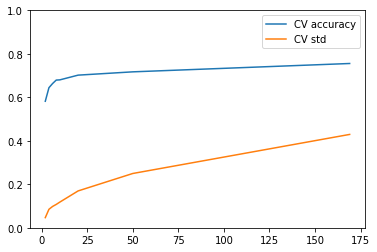

In [54]:
plt.plot(list(res1.keys()), [i[1] for i in res1.values()], label='CV accuracy')
plt.plot(list(res1.keys()), [i[2] for i in res1.values()], label='CV std')
plt.legend()
plt.ylim([0,1])

In [56]:
#check avererage of 10-times STRATIFIED k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res3 = {}
for i in [2,4,6,8,10,20,40,60]:
  acc_temp = []
  std_temp = []
  print(f'\n CV={i}   training_data={round(len(X)-(len(X)/i))}   test_data={len(X)-round(len(X)-(len(X)/i))}')
  for _ in range(50):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
    scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=i, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  print(np.array(acc_temp).mean())
  print(np.array(std_temp).mean())
  res3[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]



 CV=2   training_data=84   test_data=85
0.587156862745098
0.042016806722689065

 CV=4   training_data=127   test_data=42
0.6425387596899225
0.08039048312510122

 CV=6   training_data=141   test_data=28
0.6623891625615763
0.10438707488994878

 CV=8   training_data=148   test_data=21
0.6752867965367965
0.11400163466256724

 CV=10   training_data=152   test_data=17
0.6909558823529411
0.11949693568655922

 CV=20   training_data=161   test_data=8
0.6969305555555556
0.1572364147396121

 CV=40   training_data=165   test_data=4
0.7097749999999999
0.22072078020784336

 CV=60   training_data=166   test_data=3
0.7251666666666666
0.2665473125995345


(0.0, 1.0)

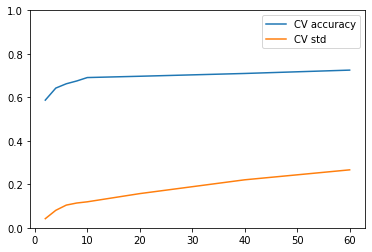

In [57]:
plt.plot(list(res3.keys()), [i[1] for i in res3.values()], label='CV accuracy')
plt.plot(list(res3.keys()), [i[2] for i in res3.values()], label='CV std')
plt.legend()
plt.ylim([0,1])

From the graphs above we showed that the performance of the classifier is independent from the k of cross validation. Indeed we can see that as long as the classifier can train on more than 50% of the Monk1 training samples (ie with k=2), the validation performance stays average for all the further k folds up until leave-one-out (k = lenght of training samples).

let's try to make it better by looking at the learning curve wrt to complexity

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)

In [23]:
#creating a control of complexity with 20 value with min_sample_leaf -> start with 1/3 of len(X_train) and reduce to 1
min_leaf_values = list(np.linspace((len(X_train)/3), 1,20, dtype=int))

In [24]:
#repeating training and validation n times and save outputs to dictionary
r_mean = {}
r_all = {}
l_val = []
for c in range(20):
  temp_mt = []
  temp_mr = []
  for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None)
    #clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                            #n_estimators=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all[c] = [temp_mr, temp_mt]
  r_mean[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


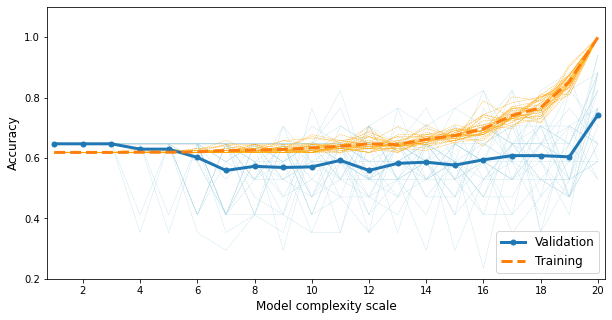

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(list(range(1,21)), [_[1] for _ in r_all.values()], linestyle='dashed', linewidth=0.4, color='lightblue')
plt.plot(list(range(1,21)), [_[0] for _ in r_all.values()], linestyle='dashed', color='orange', linewidth=0.4)
plt.plot(list(range(1,21)), [_[1] for _ in r_mean.values()], label='Validation', marker='o', markersize=5, linewidth=3)
plt.plot(list(range(1,21)), [_[0] for _ in r_mean.values()], label='Training', linestyle='dashed',linewidth=3, )
plt.locator_params(axis='x', nbins=11)
plt.ylim([0.2,1.1])
plt.xlim([0.75,20.25])
plt.xlabel('Model complexity scale', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='lower right', fontsize='large')
plt.show()

once again we can see the difference with monk1, here with monk2 the model has major struggles to learn the problem with any level of regularization. 
This plot reveals us that the problem we are facing is a languange bias problem. Indeed the language is not flexible enough to learn the problem thus our model can't generalize well. We see because our struggles to learn on the training set unless fully unregularized

Only with zero regularization can we see a slight improvement to around 70% which was the value obtained in the cross validation trils above.

Same as for monk1 we used our own GridSearch style algorithm that would include a 100 random 5-fold cross validations for every hyper parameter combination.  

as we can see from the plot above, we have no possible strategy related to hyper parameter tuning as the only best solution is when the model is fully unregularized. Thus any usage of grid search is useless

In [ ]:
def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features):
  mean_l = []
  for _ in range(num_rep):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

for i in params_df.index:
  params_df.loc[i,'mean_accuracy'] = get_average_performance(100, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])


In [62]:
#repeating experiment n times to get an idea of variance and avr performance
#(ie. no regularization)
r = {}
for _ in range(10000):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("mean of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("mean of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

[[1.0, 0.765], [1.0, 0.706], [1.0, 0.765], [1.0, 0.824], [1.0, 0.765], [1.0, 0.765], [1.0, 0.765], [1.0, 0.529], [1.0, 0.706], [1.0, 0.765]]
mean of training accuracy:  1.0
mean of validation accuracy:  0.6881
std of validation accuracy:  0.1259


we saw that the single decision tree averages 68% accuracy with 12% standard deviation.
Let's try to reduce the variance with an Ensemble method.

##### why do we use CV=10?
let's check the effect of number of CV on accuracy.
A comparison between single decision tree and ensemble

In [ ]:
#Ensemble
#check avererage of 10-times k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res_comp_ensemble = {}
for i in range(2,20,1):
  acc_temp = []
  std_temp = []
  print(f'\n i={i} l={round(len(X)-(len(X)/i))}')
  for _ in range(10):
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=0.7),
                            n_estimators=25)
    scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  res_comp_ensemble[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]



 i=2 l=84

 i=3 l=113

 i=4 l=127

 i=5 l=135

 i=6 l=141

 i=7 l=145

 i=8 l=148

 i=9 l=150

 i=10 l=152

 i=11 l=154

 i=12 l=155

 i=13 l=156

 i=14 l=157

 i=15 l=158

 i=16 l=158

 i=17 l=159

 i=18 l=160

 i=19 l=160


(0.7, 1.0)

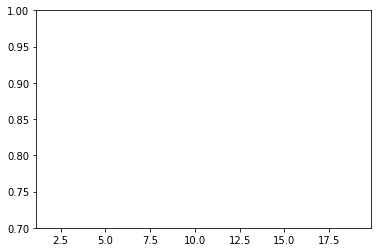

In [ ]:
plt.plot(list(res_comp_ensemble.keys()), [i[1] for i in res_comp_ensemble.values()])
plt.ylim([0.2,1])

In [ ]:
#Single decision tree
#check avererage of 10-times k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res_comp_dectree = {}
for i in range(2,20,1):
  acc_temp = []
  std_temp = []
  for _ in range(10):
    #print(f'\n i={i} l={round(len(X)-(len(X)/i))}')
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
    scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  res_comp_dectree[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]


(0.7, 1.0)

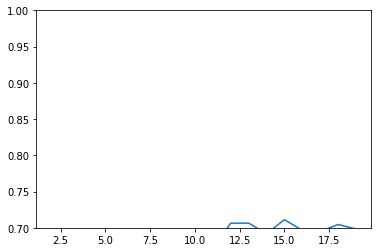

In [ ]:
plt.plot(list(res_comp_dectree.keys()), [i[1] for i in res_comp_dectree.values()])
plt.ylim([0.2,1])

from the above we can see that the ensemble needs more data to start performing well compared to the single decision tree. This shows ?
- the higher expressiveness capabilities of the ensemble ?

We will thus continue using the Ensamble with CV = 10 k fold

In [ ]:
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(100):
  clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=25)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

0.9515705128205129


### Bagged decision trees

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)


In [28]:
len(X_train)

152

In [29]:
#repeating training and validation n times and save outputs to dictionary
r_mean_box = {}
r_all_box = {}
for c in [1,10,25,50,100,500]:
  temp_mt = []
  temp_mr = []
  for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None),
                            n_estimators=c)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all_box[c] = [temp_mr, temp_mt]
  r_mean_box[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


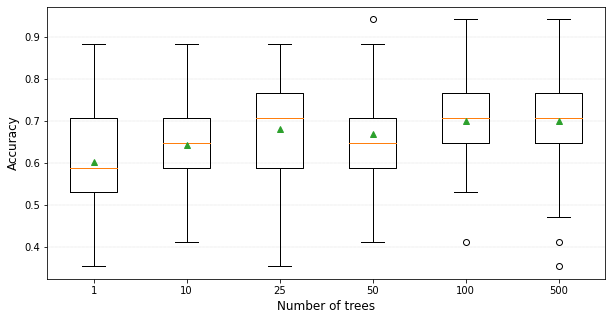

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
plt.boxplot([_[1] for _ in r_all_box.values()], labels=list(r_all_box.keys()), showmeans=True)
plt.grid(color='grey', linestyle='dashed', axis='y', linewidth=0.15)
plt.xlabel('Number of trees', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.show()

we can see that after 10 bagged trees the average does not significantly change. Overall our model scores prettry poorly even with a bagged tree

let's try to make it better by looking at the learning curve wrt to complexity

In [ ]:
#creating a control of complexity with 20 value with min_sample_leaf -> start with 1/3 of len(X_train) and reduce to 1
min_leaf_values = list(np.linspace((len(X_train)/3), 1,20, dtype=int))

In [72]:
#repeating training and validation n times and save outputs to dictionary
r_mean = {}
r_all = {}
l_val = []
for c in range(20):
  temp_mt = []
  temp_mr = []
  for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    #clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None)
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                            n_estimators=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all[c] = [temp_mr, temp_mt]
  r_mean[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


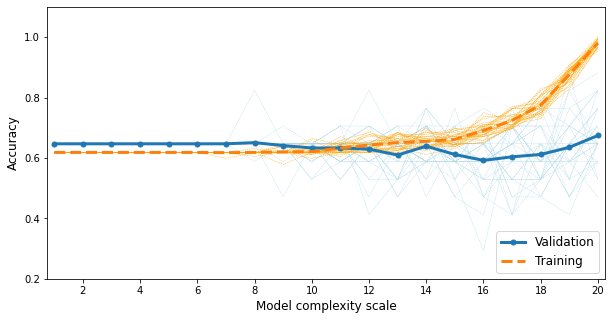

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(list(range(1,21)), [_[1] for _ in r_all.values()], linestyle='dashed', linewidth=0.4, color='lightblue')
plt.plot(list(range(1,21)), [_[0] for _ in r_all.values()], linestyle='dashed', color='orange', linewidth=0.4)
plt.plot(list(range(1,21)), [_[1] for _ in r_mean.values()], label='Validation', marker='o', markersize=5, linewidth=3)
plt.plot(list(range(1,21)), [_[0] for _ in r_mean.values()], label='Training', linestyle='dashed',linewidth=3, )
plt.locator_params(axis='x', nbins=11)
plt.ylim([0.2,1.1])
plt.xlim([0.75,20.25])
plt.xlabel('Model complexity scale', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='lower right', fontsize='large')

plotting learning curve for various n num of trees in enseble

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)

In [75]:
#creating a control of complexity with 20 value with min_sample_leaf -> start with 1/3 of len(X_train) and reduce to 1
min_leaf_values = list(np.linspace((len(X_train)/3), 1,20, dtype=int))

In [76]:
min_leaf_values

[50, 48, 45, 42, 40, 37, 34, 32, 29, 27, 24, 21, 19, 16, 14, 11, 8, 6, 3, 1]

In [77]:
#repeating training and validation n times and save outputs to dictionary
n_est = [5,10,50,100]
d = {}
for est in n_est:
  d[f'r_mean_{est}'] = {}
  d[f'r_all_{est}'] = {}
  for c in range(20):
    temp_mt = []
    temp_mr = []
    for _ in range(30):
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
      #clf = DecisionTreeClassifier(criterion='gini', max_depth=maxDepth_dic.get(c), min_samples_split=2, min_samples_leaf=1, max_features=maxFeat_dic.get(c))
      clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                              n_estimators=est)
      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_tr = clf.predict(X_train)
      temp_mt.append(round(accuracy_score(y_test, y_pred),3))
      temp_mr.append(accuracy_score(y_train, y_pred_tr))
    d[f'r_all_{est}'][c] = [temp_mr, temp_mt]
    d[f'r_mean_{est}'][c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]
d_bagging = d.copy()

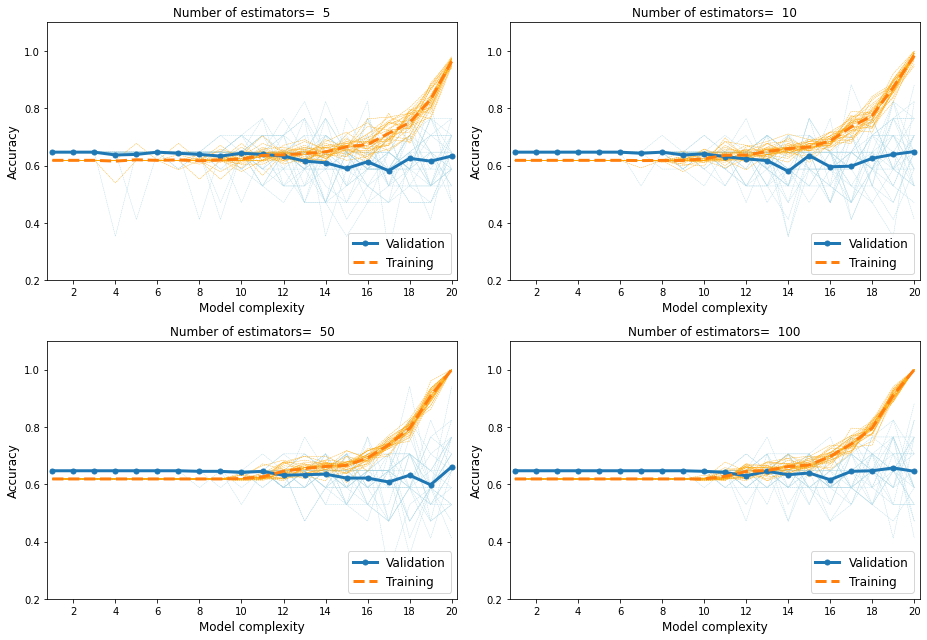

In [78]:
fig, ax = plt.subplots(2,2,figsize=(13,9))
for est, n, n1 in zip(n_est, [0,0,1,1], [0,1,0,1]):
  plt.sca(ax[n,n1])
  plt.plot(list(range(1,21)), [_[1] for _ in d_bagging[f'r_all_{est}'].values()], linestyle='dashed', linewidth=0.4, color='lightblue' )
  plt.plot(list(range(1,21)), [_[0] for _ in d_bagging[f'r_all_{est}'].values()], linestyle='dashed', color='orange', linewidth=0.4)
  plt.plot(list(range(1,21)), [_[1] for _ in d_bagging[f'r_mean_{est}'].values()], label='Validation', marker='o', markersize=5, linewidth=3)
  plt.plot(list(range(1,21)), [_[0] for _ in d_bagging[f'r_mean_{est}'].values()], label='Training', linestyle='dashed',linewidth=3, )
  plt.locator_params(axis='x', nbins=11)
  plt.ylim([0.2,1.1])
  plt.xlim([0.75,20.25])
  plt.xlabel('Model complexity', fontsize='large')
  plt.ylabel('Accuracy', fontsize='large')
  plt.legend(loc='lower right', fontsize='large')
  plt.title(f'Number of estimators=  {est}')
plt.tight_layout()
plt.show()

In [42]:
def wrapper(func, args):
    return func(*args)

def create_combination_df():
  global params_df, previous_best
  params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
  params_df = params_df.where(pd.notnull(params_df), None)
  params_df['mean_accuracy'] = None
  print("# of initial combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))
  previous_best = 0

def update_combination_df():
  global params_df
  params_df = pd.concat([params_df, pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))], axis=0, ignore_index=True)
  params_df = params_df.where(pd.notnull(params_df), None)
  print("# of new combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def previous_accuracy_higher_than_new(new_best_result):
  global previous_best
  if previous_best >= new_best_result:
      print('Stopping search because no improvements','\nprevious_best = ',previous_best, '\nnew_best = ',new_best_result)
      previous_best = new_best_result 
      return True
  else:
      if previous_best != 0: print(f'Continuing search: new_best ({new_best_result}) vs previous_best ({previous_best} = {round(((new_best_result-previous_best)/previous_best)*100,3)}')
      previous_best = new_best_result
      return False 

def update_parameters(percentage_update):
    global params
    up, low = 1+1*(percentage_update/100), 1-1*(percentage_update/100)
    key_list = list(advanced_search.keys())
    for key in list(params.keys()):
        if key in key_list:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            if advanced_search[key][1] == 'int':
                try: advanced_search[key][2] == 'min=2'
                except IndexError: min_value = 1
                else: min_value = 2
                finally: 
                        params[key] = [int(round(max(best_param_value-max(best_param_value*(percentage_update/100),1), min_value))) , int(round(max(best_param_value+max(best_param_value*(percentage_update/100),1), min_value)))]                        
                        #params[key] = [int(max(best_param_value*low, min_value)), int(max(best_param_value*up, min_value))]
            elif advanced_search[key][1] == 'float':
                params[key] = [best_param_value*low, best_param_value*up]
        else:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [best_param_value]
    update_combination_df()

def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features), 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), error_score='raise')
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

def launch_search(crossval_repetitions=3):
  global params_df, temp_index
  print('# of crossval_repetitions: ', crossval_repetitions)
  temp_index = params_df.loc[params_df.mean_accuracy.isna()].index
  for i in temp_index:
    try:
      #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
      params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([crossval_repetitions]+ [params_df.loc[i,_] for _ in list(params.keys())])) 
      params_df.loc[i,'#crossval_repetitions'] = int(crossval_repetitions)
      print(dict(params_df.loc[i,[_ for _ in list(params_df) if _ != '#crossval_repetitions']]))
    except ValueError as E:
      print(f'skipped combination {i}:', E)
      pass  

In [43]:
params = {'min_samples_split': [2,4],
              'min_samples_leaf': [2],
              'max_features': [None],
              'n_estimators': [50]}
advanced_search = {'n_estimators':[30, 'int'], 'min_samples_leaf':[20,'int']}

create_combination_df()
for loop in range(10):
  print(f'loop {loop}')
  launch_search(crossval_repetitions=min(5+(loop*2),10))
  if previous_accuracy_higher_than_new(params_df.loc[temp_index,'mean_accuracy'].max()): 
    break
  else:
    update_parameters(percentage_update=30-(loop*2))

# of initial combinations:  2
loop 0
# of crossval_repetitions:  5
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'n_estimators': 50, 'mean_accuracy': 0.6565441176470588}
{'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'n_estimators': 50, 'mean_accuracy': 0.6500000000000001}
# of new combinations:  4
loop 1
# of crossval_repetitions:  7
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'n_estimators': 35, 'mean_accuracy': 0.6637605042016806}
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'n_estimators': 65, 'mean_accuracy': 0.679516806722689}
{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'n_estimators': 35, 'mean_accuracy': 0.6357668067226891}
{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'n_estimators': 65, 'mean_accuracy': 0.6548319327731092}
Continuing search: new_best (0.679516806722689) vs previous_best (0.6565441176470588 = 3.499
# of new combina

In [44]:
best_performers_df = params_df.sort_values(by=['mean_accuracy','#crossval_repetitions'], ascending=False).reset_index().copy()
best_performers_df

index  min_samples_split  ...  mean_accuracy #crossval_repetitions
0      3                  2  ...       0.679517                     7
1      7                  2  ...       0.668668                     9
2      2                  2  ...       0.663761                     7
3      6                  2  ...       0.660253                     9
4      0                  2  ...       0.656544                     5
5      5                  2  ...       0.654832                     7
6      1                  4  ...           0.65                     5
7      8                  2  ...       0.645792                     9
8      9                  2  ...       0.644118                     9
9      4                  2  ...       0.635767                     7

[10 rows x 7 columns]

### RandomForest

plotting for Random Forest

In [79]:
#repeating training and validation n times and save outputs to dictionary
n_est = [5,10,50,100]
d = {}
for est in n_est:
  d[f'r_mean_{est}'] = {}
  d[f'r_all_{est}'] = {}
  for c in range(20):
    temp_mt = []
    temp_mr = []
    for _ in range(30):
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
      clf = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None, 
                              n_estimators=est)
      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_tr = clf.predict(X_train)
      temp_mt.append(round(accuracy_score(y_test, y_pred),3))
      temp_mr.append(accuracy_score(y_train, y_pred_tr))
    d[f'r_all_{est}'][c] = [temp_mr, temp_mt]
    d[f'r_mean_{est}'][c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]
d_forest = d.copy()

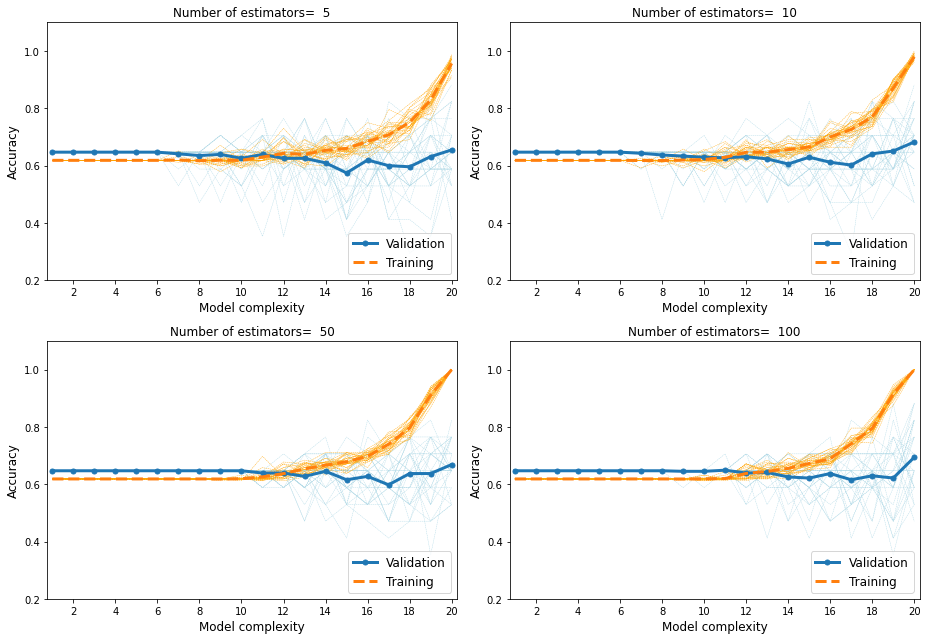

In [80]:
fig, ax = plt.subplots(2,2,figsize=(13,9))
for est, n, n1 in zip(n_est, [0,0,1,1], [0,1,0,1]):
  plt.sca(ax[n,n1])
  plt.plot(list(range(1,21)), [_[1] for _ in d_forest[f'r_all_{est}'].values()], linestyle='dashed', linewidth=0.4, color='lightblue' )
  plt.plot(list(range(1,21)), [_[0] for _ in d_forest[f'r_all_{est}'].values()], linestyle='dashed', color='orange', linewidth=0.4)
  plt.plot(list(range(1,21)), [_[1] for _ in d_forest[f'r_mean_{est}'].values()], label='Validation', marker='o', markersize=5, linewidth=3)
  plt.plot(list(range(1,21)), [_[0] for _ in d_forest[f'r_mean_{est}'].values()], label='Training', linestyle='dashed',linewidth=3, )
  plt.locator_params(axis='x', nbins=11)
  plt.ylim([0.2,1.1])
  plt.xlim([0.75,20.25])
  plt.xlabel('Model complexity', fontsize='large')
  plt.ylabel('Accuracy', fontsize='large')
  plt.legend(loc='lower right', fontsize='large')
  plt.title(f'Number of estimators=  {est}')
plt.tight_layout()
plt.show()

In [45]:
def wrapper(func, args):
    return func(*args)

def create_combination_df():
  global params_df, previous_best
  params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
  params_df = params_df.where(pd.notnull(params_df), None)
  params_df['mean_accuracy'] = None
  print("# of initial combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))
  previous_best = 0

def update_combination_df():
  global params_df
  params_df = pd.concat([params_df, pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))], axis=0, ignore_index=True)
  params_df = params_df.where(pd.notnull(params_df), None)
  print("# of new combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def previous_accuracy_higher_than_new(new_best_result):
  global previous_best
  if previous_best >= new_best_result:
      print('Stopping search because no improvements','\nprevious_best = ',previous_best, '\nnew_best = ',new_best_result)
      previous_best = new_best_result 
      return True
  else:
      if previous_best != 0: print(f'Continuing search: new_best ({new_best_result}) vs previous_best ({previous_best} = {round(((new_best_result-previous_best)/previous_best)*100,3)}')
      previous_best = new_best_result
      return False 

def update_parameters(percentage_update):
    global params
    up, low = 1+1*(percentage_update/100), 1-1*(percentage_update/100)
    key_list = list(advanced_search.keys())
    for key in list(params.keys()):
        if key in key_list:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            if advanced_search[key][1] == 'int':
                try: advanced_search[key][2] == 'min=2'
                except IndexError: min_value = 1
                else: min_value = 2
                finally: 
                        params[key] = [int(round(max(best_param_value-max(best_param_value*(percentage_update/100),1), min_value))) , int(round(max(best_param_value+max(best_param_value*(percentage_update/100),1), min_value)))]                        
                        #params[key] = [int(max(best_param_value*low, min_value)), int(max(best_param_value*up, min_value))]
            elif advanced_search[key][1] == 'float':
                params[key] = [best_param_value*low, best_param_value*up]
        else:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [best_param_value]
    update_combination_df()

def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features, 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), error_score='raise')
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

def launch_search(crossval_repetitions=3):
  global params_df, temp_index
  print('# of crossval_repetitions: ', crossval_repetitions)
  temp_index = params_df.loc[params_df.mean_accuracy.isna()].index
  for i in temp_index:
    try:
      #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
      params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([crossval_repetitions]+ [params_df.loc[i,_] for _ in list(params.keys())])) 
      params_df.loc[i,'#crossval_repetitions'] = int(crossval_repetitions)
      print(dict(params_df.loc[i,[_ for _ in list(params_df) if _ != '#crossval_repetitions']]))
    except ValueError as E:
      print(f'skipped combination {i}:', E)
      pass  

In [46]:
params = {'min_samples_split': [2,4],
              'min_samples_leaf': [2],
              'max_features': [None],
              'n_estimators': [100]}
advanced_search = {'n_estimators':[30, 'int'], 'min_samples_leaf':[20,'int']}

create_combination_df()
for loop in range(10):
  print(f'loop {loop}')
  launch_search(crossval_repetitions=min(5+(loop*2),10))
  if previous_accuracy_higher_than_new(params_df.loc[temp_index,'mean_accuracy'].max()):
    break
  else:
    update_parameters(percentage_update=30-(loop*2))


# of initial combinations:  2
loop 0
# of crossval_repetitions:  5
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'n_estimators': 100, 'mean_accuracy': 0.6494852941176471}
{'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'n_estimators': 100, 'mean_accuracy': 0.6723529411764706}
# of new combinations:  4
loop 1
# of crossval_repetitions:  7
{'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'n_estimators': 70, 'mean_accuracy': 0.6671218487394958}
{'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'n_estimators': 130, 'mean_accuracy': 0.6551470588235294}
{'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'n_estimators': 70, 'mean_accuracy': 0.6491071428571429}
{'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'n_estimators': 130, 'mean_accuracy': 0.647373949579832}
Stopping search because no improvements 
previous_best =  0.6723529411764706 
new_best =  0.6671218487394

In [47]:
best_performers_df = params_df.sort_values(by=['mean_accuracy','#crossval_repetitions'], ascending=False).reset_index().copy()
best_performers_df

index  min_samples_split  ...  mean_accuracy #crossval_repetitions
0      1                  4  ...       0.672353                     5
1      2                  4  ...       0.667122                     7
2      3                  4  ...       0.655147                     7
3      0                  2  ...       0.649485                     5
4      4                  4  ...       0.649107                     7
5      5                  4  ...       0.647374                     7

[6 rows x 7 columns]

### AdaBoost

plotting for AdaBoost

In [81]:
#repeating training and validation n times and save outputs to dictionary
n_est = [5,10,50,100]
d = {}
for est in n_est:
  d[f'r_mean_{est}'] = {}
  d[f'r_all_{est}'] = {}
  for c in range(20):
    temp_mt = []
    temp_mr = []
    for _ in range(30):
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
      #clf = DecisionTreeClassifier(criterion='gini', max_depth=maxDepth_dic.get(c), min_samples_split=2, min_samples_leaf=1, max_features=maxFeat_dic.get(c))
      clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                              n_estimators=est)
      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_tr = clf.predict(X_train)
      temp_mt.append(round(accuracy_score(y_test, y_pred),3))
      temp_mr.append(accuracy_score(y_train, y_pred_tr))
    d[f'r_all_{est}'][c] = [temp_mr, temp_mt]
    d[f'r_mean_{est}'][c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]
d_ada = d.copy()

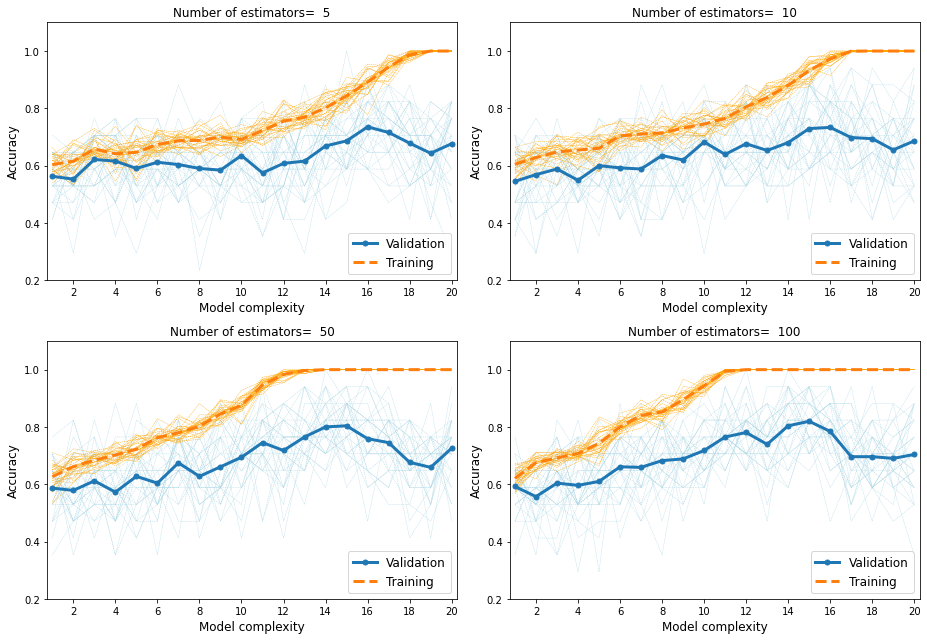

In [82]:
fig, ax = plt.subplots(2,2,figsize=(13,9))
for est, n, n1 in zip(n_est, [0,0,1,1], [0,1,0,1]):
  plt.sca(ax[n,n1])
  plt.plot(list(range(1,21)), [_[1] for _ in d_ada[f'r_all_{est}'].values()], linestyle='dashed', linewidth=0.4, color='lightblue' )
  plt.plot(list(range(1,21)), [_[0] for _ in d_ada[f'r_all_{est}'].values()], linestyle='dashed', color='orange', linewidth=0.4)
  plt.plot(list(range(1,21)), [_[1] for _ in d_ada[f'r_mean_{est}'].values()], label='Validation', marker='o', markersize=5, linewidth=3)
  plt.plot(list(range(1,21)), [_[0] for _ in d_ada[f'r_mean_{est}'].values()], label='Training', linestyle='dashed',linewidth=3, )
  plt.locator_params(axis='x', nbins=11)
  plt.ylim([0.2,1.1])
  plt.xlim([0.75,20.25])
  plt.xlabel('Model complexity', fontsize='large')
  plt.ylabel('Accuracy', fontsize='large')
  plt.legend(loc='lower right', fontsize='large')
  plt.title(f'Number of estimators=  {est}')
plt.tight_layout()
plt.show()

In [49]:
min_leaf_values

[50, 48, 45, 42, 40, 37, 34, 32, 29, 27, 24, 21, 19, 16, 14, 11, 8, 6, 3, 1]

In [50]:
def wrapper(func, args):
    return func(*args)

def create_combination_df():
  global params_df, previous_best
  params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
  params_df = params_df.where(pd.notnull(params_df), None)
  params_df['mean_accuracy'] = None
  print("# of initial combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))
  previous_best = 0

def update_combination_df():
  global params_df
  params_df = pd.concat([params_df, pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))], axis=0, ignore_index=True)
  params_df = params_df.where(pd.notnull(params_df), None)
  print("# of new combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def previous_accuracy_higher_than_new(new_best_result):
  global previous_best
  if previous_best >= new_best_result:
      print('Stopping search because no improvements','\nprevious_best = ',previous_best, '\nnew_best = ',new_best_result)
      previous_best = new_best_result 
      return True
  else:
      if previous_best != 0: print(f'Continuing search: new_best ({new_best_result}) vs previous_best ({previous_best} = {round(((new_best_result-previous_best)/previous_best)*100,3)}')
      previous_best = new_best_result
      return False 

def get_type(par, val):
  if advanced_search[par][1] == 'int': return int(val)
  if advanced_search[par][1] == 'float': return float(val)

def update_parameters(percentage_update):
    global params
    up, low = 1+1*(percentage_update/100), 1-1*(percentage_update/100)
    key_list = list(advanced_search.keys())
    for key in list(params.keys()):
        if key in key_list:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [get_type(key, best_param_value*low) , get_type(key, best_param_value*up)]
        else:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [best_param_value]
    update_combination_df()

def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features), 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), error_score='raise')
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

def launch_search(crossval_repetitions=3):
  global params_df, temp_index
  print('# of crossval_repetitions: ', crossval_repetitions)
  temp_index = params_df.loc[params_df.mean_accuracy.isna()].index
  for i in temp_index:
    try:
      #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
      params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([crossval_repetitions]+ [params_df.loc[i,_] for _ in list(params.keys())])) 
      params_df.loc[i,'#crossval_repetitions'] = int(crossval_repetitions)
      print(dict(params_df.loc[i,[_ for _ in list(params_df) if _ != '#crossval_repetitions']]))
    except ValueError as E:
      print(f'skipped combination {i}:', E)
      pass  

In [51]:
params = {'min_samples_split': [25],
              'min_samples_leaf': [25],
              'max_features': [None],
              'n_estimators': [50]}
advanced_search = {'n_estimators':[30, 'int'], 'min_samples_split':[20, 'int'], 'min_samples_leaf':[20,'int']}

create_combination_df()
for loop in range(10):
  print(f'loop {loop}')
  launch_search(crossval_repetitions=8+(loop*2))
  if previous_accuracy_higher_than_new(params_df.loc[temp_index,'mean_accuracy'].max()): 
    break
  else:
    update_parameters(percentage_update=20-(loop*2))


# of initial combinations:  1
loop 0
# of crossval_repetitions:  8
{'min_samples_split': 25, 'min_samples_leaf': 25, 'max_features': None, 'n_estimators': 50, 'mean_accuracy': 0.7056066176470588}
# of new combinations:  8
loop 1
# of crossval_repetitions:  10
{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': None, 'n_estimators': 40, 'mean_accuracy': 0.7219852941176471}
{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': None, 'n_estimators': 60, 'mean_accuracy': 0.7444117647058823}
{'min_samples_split': 20, 'min_samples_leaf': 30, 'max_features': None, 'n_estimators': 40, 'mean_accuracy': 0.6361764705882353}
{'min_samples_split': 20, 'min_samples_leaf': 30, 'max_features': None, 'n_estimators': 60, 'mean_accuracy': 0.6420588235294118}
{'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': None, 'n_estimators': 40, 'mean_accuracy': 0.7093382352941175}
{'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': None, 'n_estimators': 60, 'me

In [52]:
best_performers_df = params_df.sort_values(by=['mean_accuracy','#crossval_repetitions'], ascending=False).reset_index().copy()
best_performers_df

index  min_samples_split  ...  mean_accuracy #crossval_repetitions
0      40                 22  ...       0.819751                    18
1      44                 19  ...       0.815588                    20
2      35                 17  ...       0.813113                    18
3      46                 24  ...       0.812077                    20
4      48                 24  ...       0.810882                    20
5      32                 20  ...       0.809697                    16
6      43                 19  ...       0.807426                    20
7      22                 18  ...       0.805987                    14
8      27                 15  ...       0.805032                    16
9      17                 13  ...       0.804963                    14
10     36                 17  ...       0.804453                    18
11     28                 15  ...       0.804067                    16
12     42                 19  ...       0.803143                    20
13     47                 24  ...       0.803125                    20
14     10                 16  ...       0.800245                    12
15     45                 24  ...       0.800202                    20
16     18                 13  ...       0.798293                    14
17     31                 20  ...       0.797243                    16
18     39                 22  ...       0.796078                    18
19     41                 19  ...       0.795551                    20
20     37                 22  ...       0.795016                    18
21     21                 18  ...       0.793409                    14
22     33                 17  ...       0.793321                    18
23     14                 23  ...       0.792831                    12
24     38                 22  ...       0.791891                    18
25     30                 20  ...       0.791866                    16
26     34                 17  ...       0.791217                    18
27     13                 23  ...       0.788572                    12
28     26                 15  ...       0.788465                    16
29      9                 16  ...       0.787776                    12
30     25                 15  ...       0.787178                    16
31     29                 20  ...       0.786696                    16
32     24                 18  ...       0.782143                    14
33     20                 13  ...       0.780725                    14
34     19                 13  ...       0.769196                    14
35     23                 18  ...       0.761896                    14
36      2                 20  ...       0.744412                    10
37     12                 16  ...       0.736489                    12
38      6                 30  ...       0.736287                    10
39     16                 23  ...       0.733793                    12
40      1                 20  ...       0.721985                    10
41     11                 16  ...       0.709773                    12
42      5                 30  ...       0.709338                    10
43      0                 25  ...       0.705607                     8
44     15                 23  ...       0.699418                    12
45      8                 30  ...          0.645                    10
46      4                 20  ...       0.642059                    10
47      7                 30  ...       0.641434                    10
48      3                 20  ...       0.636176                    10

[49 rows x 7 columns]

testing GridSearch best results

In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
r = {}
for _ in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=15, min_samples_split=22, max_features=None), n_estimators=103)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("average of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("average of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

In [ ]:
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(100):
  clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=15, min_samples_split=22, max_features=None), n_estimators=103)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), n_jobs=-1)
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

# MONK3

In [58]:
monk3_train.shape

NameError: ignored

In [ ]:
monk2_test.shape

(263, 7)

### data partitionning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
monk2_train.iloc[:,:-1]

attr_1  attr_2  attr_3  attr_4  attr_5  attr_6
0         1       1       1       1       2       2
1         1       1       1       1       4       1
2         1       1       1       2       1       1
3         1       1       1       2       1       2
4         1       1       1       2       2       1
..      ...     ...     ...     ...     ...     ...
164       3       3       2       2       3       1
165       3       3       2       2       3       2
166       3       3       2       3       1       1
167       3       3       2       3       2       1
168       3       3       2       3       4       2

[169 rows x 6 columns]

In [ ]:
X = monk2_train.iloc[:,:-1]
y = monk2_train['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

### attribute encoding

In [ ]:
#with sklearn OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = onehot_encoder.fit_transform(monk2_train.iloc[:,:-1])
X_encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.]])

In [ ]:
#with Pandas get_dummies
X_encoded = pd.get_dummies(monk2_train.iloc[:,:-1].astype('str'), prefix_sep='=')

In [ ]:
X_encoded

attr_1=1  attr_1=2  attr_1=3  ...  attr_5=4  attr_6=1  attr_6=2
0           1         0         0  ...         0         0         1
1           1         0         0  ...         1         1         0
2           1         0         0  ...         0         1         0
3           1         0         0  ...         0         0         1
4           1         0         0  ...         0         1         0
..        ...       ...       ...  ...       ...       ...       ...
164         0         0         1  ...         0         1         0
165         0         0         1  ...         0         0         1
166         0         0         1  ...         0         1         0
167         0         0         1  ...         0         1         0
168         0         0         1  ...         1         0         1

[169 rows x 17 columns]

### Decision tree - Monk2

In [ ]:
#first trial to get an idea of the of the fitting capabilities of the model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)
print('train acc. : ',accuracy_score(y_train, y_pred_tr))
print('test acc. : ',accuracy_score(y_test, y_pred))
print('confusion matrix: \n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

train acc. :  1.0
test acc. :  0.7647058823529411
confusion matrix: 
 [[7 4]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.60      1.00      0.75         6

    accuracy                           0.76        17
   macro avg       0.80      0.82      0.76        17
weighted avg       0.86      0.76      0.77        17



In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
r = {}
for _ in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("average of multiple hold-out validation accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("average of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

[[1.0, 0.824], [1.0, 0.647], [1.0, 0.588], [1.0, 0.706], [1.0, 0.765], [1.0, 0.765], [1.0, 0.647], [1.0, 0.765], [1.0, 0.765], [1.0, 0.588]]
average of multiple hold-out validation accuracy:  1.0
average of multiple hold-out validation accuracy:  0.6841
std of multiple hold-out validation accuracy:  0.1246


compared to MONK1, the MONK2 looks harder to learn. The simple decision tree without regularizatoin has very low generalization capabilities (68%) and a relatively high standard dev (12%).

In [ ]:
res = {}
for i in range(3,15):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
  scores = cross_val_score(clf, X, y, cv=i)
  res[i] = [round(scores.mean(),3), round(scores.std(),3)]
print(res)

{3: [0.567, 0.072], 4: [0.622, 0.13], 5: [0.651, 0.127], 6: [0.644, 0.125], 7: [0.633, 0.134], 8: [0.645, 0.167], 9: [0.715, 0.176], 10: [0.681, 0.18], 11: [0.737, 0.158], 12: [0.805, 0.087], 13: [0.751, 0.132], 14: [0.77, 0.137]}


we saw that, at first glance, the k of k-fold cross validation seemed to influence the performance of the decision tree. 
We thought that such fluctuation could be due to the fact that by increasing K, we let the model train of more samples and thus by the SLT, allow the model generalize better. 
In order to check our assumptions, we performed a repeated cross validation in order to decrease the variance of the results

In [ ]:
#check one-time k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res1 = {}
for i in [2,4,6,8,10,20,50,169]:
  acc_temp = []
  std_temp = []
  print(f'\n CV={i}   training_data={round(len(X)-(len(X)/i))}   test_data={len(X)-round(len(X)-(len(X)/i))}')
  for _ in range(50):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
    scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  print(np.array(acc_temp).mean())
  print(np.array(std_temp).mean())
  res1[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]


 CV=2   training_data=84   test_data=85
0.5820056022408964
0.04678151260504203

 CV=4   training_data=127   test_data=42
0.6443410852713178
0.08507973099939223

 CV=6   training_data=141   test_data=28
0.663448275862069
0.09820996884280404

 CV=8   training_data=148   test_data=21
0.6793506493506491
0.10755489519767596

 CV=10   training_data=152   test_data=17
0.6803676470588235
0.11833299308795484

 CV=20   training_data=161   test_data=8
0.7020833333333333
0.16958330944267136

 CV=50   training_data=166   test_data=3
0.7172333333333333
0.24978389180055618

 CV=169   training_data=168   test_data=1
0.7556213017751479
0.4294439085356265


(0.0, 1.0)

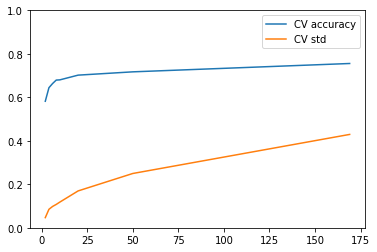

In [ ]:
plt.plot(list(res1.keys()), [i[1] for i in res1.values()], label='CV accuracy')
plt.plot(list(res1.keys()), [i[2] for i in res1.values()], label='CV std')
plt.legend()
plt.ylim([0,1])

In [ ]:
#check avererage of 10-times STRATIFIED k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res3 = {}
for i in [2,4,6,8,10,20,40,60]:
  acc_temp = []
  std_temp = []
  print(f'\n CV={i}   training_data={round(len(X)-(len(X)/i))}   test_data={len(X)-round(len(X)-(len(X)/i))}')
  for _ in range(50):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
    scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=i, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  print(np.array(acc_temp).mean())
  print(np.array(std_temp).mean())
  res3[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]



 CV=2   training_data=84   test_data=85
0.587156862745098
0.042016806722689065

 CV=4   training_data=127   test_data=42
0.6425387596899225
0.08039048312510122

 CV=6   training_data=141   test_data=28
0.6623891625615763
0.10438707488994878

 CV=8   training_data=148   test_data=21
0.6752867965367965
0.11400163466256724

 CV=10   training_data=152   test_data=17
0.6909558823529411
0.11949693568655922

 CV=20   training_data=161   test_data=8
0.6969305555555556
0.1572364147396121

 CV=40   training_data=165   test_data=4
0.7097749999999999
0.22072078020784336

 CV=60   training_data=166   test_data=3
0.7251666666666666
0.2665473125995345


(0.0, 1.0)

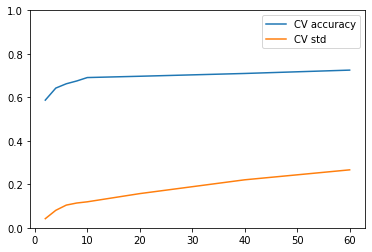

In [ ]:
plt.plot(list(res3.keys()), [i[1] for i in res3.values()], label='CV accuracy')
plt.plot(list(res3.keys()), [i[2] for i in res3.values()], label='CV std')
plt.legend()
plt.ylim([0,1])

From the graphs above we showed that the performance of the classifier is independent from the k of cross validation. Indeed we can see that as long as the classifier can train on more than 50% of the Monk1 training samples (ie with k=2), the validation performance stays average for all the further k folds up until leave-one-out (k = lenght of training samples).

let's try to make it better by looking at the learning curve wrt to complexity

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)

In [ ]:
#creating a control of complexity with 20 value with min_sample_leaf -> start with 1/3 of len(X_train) and reduce to 1
min_leaf_values = list(np.linspace((len(X_train)/3), 1,20, dtype=int))

In [ ]:
#repeating training and validation n times and save outputs to dictionary
r_mean = {}
r_all = {}
l_val = []
for c in range(20):
  temp_mt = []
  temp_mr = []
  for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None)
    #clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                            #n_estimators=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all[c] = [temp_mr, temp_mt]
  r_mean[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


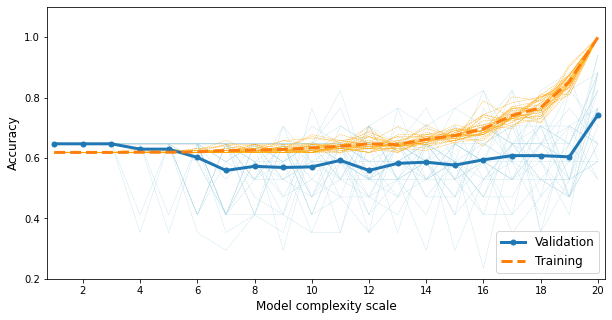

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(list(range(1,21)), [_[1] for _ in r_all.values()], linestyle='dashed', linewidth=0.4, color='lightblue')
plt.plot(list(range(1,21)), [_[0] for _ in r_all.values()], linestyle='dashed', color='orange', linewidth=0.4)
plt.plot(list(range(1,21)), [_[1] for _ in r_mean.values()], label='Validation', marker='o', markersize=5, linewidth=3)
plt.plot(list(range(1,21)), [_[0] for _ in r_mean.values()], label='Training', linestyle='dashed',linewidth=3, )
plt.locator_params(axis='x', nbins=11)
plt.ylim([0.2,1.1])
plt.xlim([0.75,20.25])
plt.xlabel('Model complexity scale', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='lower right', fontsize='large')
plt.show()

once again we can see the difference with monk1, here with monk2 the model has major struggles to learn the problem with any level of regularization. 
This plot reveals us that the problem we are facing is a languange bias problem. Indeed the language is not flexible enough to learn the problem thus our model can't generalize well. We see because our struggles to learn on the training set unless fully unregularized

Only with zero regularization can we see a slight improvement to around 70% which was the value obtained in the cross validation trils above.

Same as for monk1 we used our own GridSearch style algorithm that would include a 100 random 5-fold cross validations for every hyper parameter combination.  

as we can see from the plot above, we have no possible strategy related to hyper parameter tuning as the only best solution is when the model is fully unregularized. Thus any usage of grid search is useless

In [ ]:
def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features):
  mean_l = []
  for _ in range(num_rep):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

for i in params_df.index:
  params_df.loc[i,'mean_accuracy'] = get_average_performance(100, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])


In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
#(ie. no regularization)
r = {}
for _ in range(10000):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("mean of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("mean of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

[[1.0, 0.765], [1.0, 0.706], [1.0, 0.765], [1.0, 0.824], [1.0, 0.765], [1.0, 0.765], [1.0, 0.765], [1.0, 0.529], [1.0, 0.706], [1.0, 0.765]]
mean of training accuracy:  1.0
mean of validation accuracy:  0.6881
std of validation accuracy:  0.1259


we saw that the single decision tree averages 68% accuracy with 12% standard deviation.
Let's try to reduce the variance with an Ensemble method.

##### why do we use CV=10?
let's check the effect of number of CV on accuracy.
A comparison between single decision tree and ensemble

In [ ]:
#Ensemble
#check avererage of 10-times k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res_comp_ensemble = {}
for i in range(2,20,1):
  acc_temp = []
  std_temp = []
  print(f'\n i={i} l={round(len(X)-(len(X)/i))}')
  for _ in range(10):
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=0.7),
                            n_estimators=25)
    scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  res_comp_ensemble[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]



 i=2 l=84

 i=3 l=113

 i=4 l=127

 i=5 l=135

 i=6 l=141

 i=7 l=145

 i=8 l=148

 i=9 l=150

 i=10 l=152

 i=11 l=154

 i=12 l=155

 i=13 l=156

 i=14 l=157

 i=15 l=158

 i=16 l=158

 i=17 l=159

 i=18 l=160

 i=19 l=160


(0.7, 1.0)

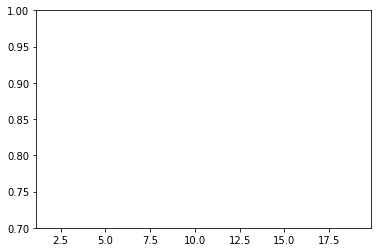

In [ ]:
plt.plot(list(res_comp_ensemble.keys()), [i[1] for i in res_comp_ensemble.values()])
plt.ylim([0.2,1])

In [ ]:
#Single decision tree
#check avererage of 10-times k cross validation results of unregularized decision tree for k ranging from 2 to 124 (hold-one-out)
res_comp_dectree = {}
for i in range(2,20,1):
  acc_temp = []
  std_temp = []
  for _ in range(10):
    #print(f'\n i={i} l={round(len(X)-(len(X)/i))}')
    clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1) 
    scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True))
    #print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    f1scores = cross_val_score(clf, X_encoded, y, cv=KFold(n_splits=i, random_state=None, shuffle=True), scoring='f1_macro')
    #print('F1-score: %0.4f (+/- %0.2f)' % (f1scores.mean(), f1scores.std() * 2))
    acc_temp.append(scores.mean())
    std_temp.append(scores.std())
  res_comp_dectree[i] = [round(len(X)-(len(X)/i)), np.array(acc_temp).mean(), np.array(std_temp).mean()]


(0.7, 1.0)

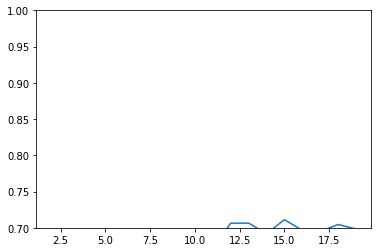

In [ ]:
plt.plot(list(res_comp_dectree.keys()), [i[1] for i in res_comp_dectree.values()])
plt.ylim([0.2,1])

from the above we can see that the ensemble needs more data to start performing well compared to the single decision tree. This shows ?
- the higher expressiveness capabilities of the ensemble ?

We will thus continue using the Ensamble with CV = 10 k fold

In [ ]:
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(100):
  clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=25)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True))
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())

0.9515705128205129


### Bagged decision trees

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)


In [ ]:
len(X_train)

152

In [ ]:
#repeating training and validation n times and save outputs to dictionary
r_mean_box = {}
r_all_box = {}
for c in [1,10,25,50,100,500]:
  temp_mt = []
  temp_mr = []
  for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None),
                            n_estimators=c)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all_box[c] = [temp_mr, temp_mt]
  r_mean_box[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


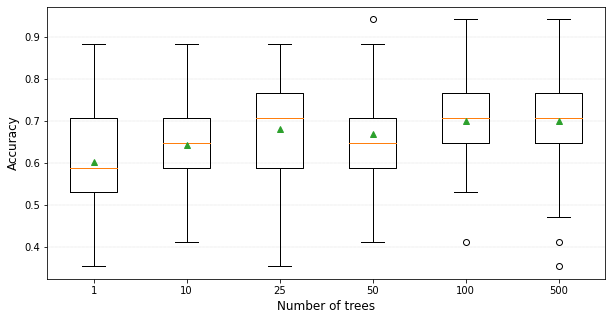

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.boxplot([_[1] for _ in r_all_box.values()], labels=list(r_all_box.keys()), showmeans=True)
plt.grid(color='grey', linestyle='dashed', axis='y', linewidth=0.15)
plt.xlabel('Number of trees', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.show()

we can see that after 10 bagged trees the average does not significantly change. Overall our model scores prettry poorly even with a bagged tree

let's try to make it better by looking at the learning curve wrt to complexity

In [ ]:
#creating a control of complexity with 20 value with min_sample_leaf -> start with 1/3 of len(X_train) and reduce to 1
min_leaf_values = list(np.linspace((len(X_train)/3), 1,20, dtype=int))

In [ ]:
#repeating training and validation n times and save outputs to dictionary
r_mean = {}
r_all = {}
l_val = []
for c in range(20):
  temp_mt = []
  temp_mr = []
  for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
    #clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None)
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                            n_estimators=10)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    temp_mt.append(round(accuracy_score(y_test, y_pred),3))
    temp_mr.append(accuracy_score(y_train, y_pred_tr))
  r_all[c] = [temp_mr, temp_mt]
  r_mean[c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]


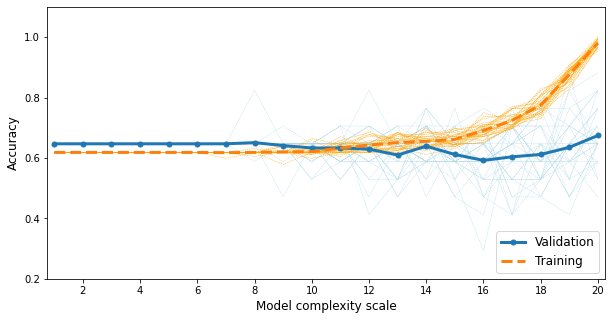

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(list(range(1,21)), [_[1] for _ in r_all.values()], linestyle='dashed', linewidth=0.4, color='lightblue')
plt.plot(list(range(1,21)), [_[0] for _ in r_all.values()], linestyle='dashed', color='orange', linewidth=0.4)
plt.plot(list(range(1,21)), [_[1] for _ in r_mean.values()], label='Validation', marker='o', markersize=5, linewidth=3)
plt.plot(list(range(1,21)), [_[0] for _ in r_mean.values()], label='Training', linestyle='dashed',linewidth=3, )
plt.locator_params(axis='x', nbins=11)
plt.ylim([0.2,1.1])
plt.xlim([0.75,20.25])
plt.xlabel('Model complexity scale', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='lower right', fontsize='large')

plotting learning curve for various n num of trees in enseble

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)

In [ ]:
#creating a control of complexity with 20 value with min_sample_leaf -> start with 1/3 of len(X_train) and reduce to 1
min_leaf_values = list(np.linspace((len(X_train)/3), 1,20, dtype=int))

In [ ]:
min_leaf_values

[50, 48, 45, 42, 40, 37, 34, 32, 29, 27, 24, 21, 19, 16, 14, 11, 8, 6, 3, 1]

In [ ]:
#repeating training and validation n times and save outputs to dictionary
n_est = [5,10,50,100]
d = {}
for est in n_est:
  d[f'r_mean_{est}'] = {}
  d[f'r_all_{est}'] = {}
  for c in range(20):
    temp_mt = []
    temp_mr = []
    for _ in range(30):
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
      #clf = DecisionTreeClassifier(criterion='gini', max_depth=maxDepth_dic.get(c), min_samples_split=2, min_samples_leaf=1, max_features=maxFeat_dic.get(c))
      clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                              n_estimators=est)
      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_tr = clf.predict(X_train)
      temp_mt.append(round(accuracy_score(y_test, y_pred),3))
      temp_mr.append(accuracy_score(y_train, y_pred_tr))
    d[f'r_all_{est}'][c] = [temp_mr, temp_mt]
    d[f'r_mean_{est}'][c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]
d_bagging = d.copy()

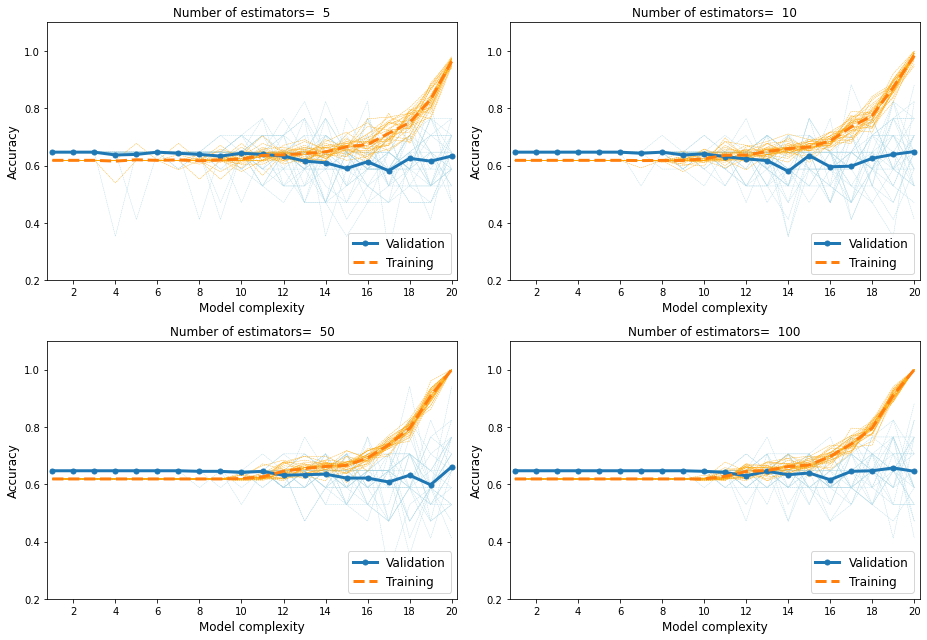

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(13,9))
for est, n, n1 in zip(n_est, [0,0,1,1], [0,1,0,1]):
  plt.sca(ax[n,n1])
  plt.plot(list(range(1,21)), [_[1] for _ in d_bagging[f'r_all_{est}'].values()], linestyle='dashed', linewidth=0.4, color='lightblue' )
  plt.plot(list(range(1,21)), [_[0] for _ in d_bagging[f'r_all_{est}'].values()], linestyle='dashed', color='orange', linewidth=0.4)
  plt.plot(list(range(1,21)), [_[1] for _ in d_bagging[f'r_mean_{est}'].values()], label='Validation', marker='o', markersize=5, linewidth=3)
  plt.plot(list(range(1,21)), [_[0] for _ in d_bagging[f'r_mean_{est}'].values()], label='Training', linestyle='dashed',linewidth=3, )
  plt.locator_params(axis='x', nbins=11)
  plt.ylim([0.2,1.1])
  plt.xlim([0.75,20.25])
  plt.xlabel('Model complexity', fontsize='large')
  plt.ylabel('Accuracy', fontsize='large')
  plt.legend(loc='lower right', fontsize='large')
  plt.title(f'Number of estimators=  {est}')
plt.tight_layout()
plt.show()

In [ ]:
def wrapper(func, args):
    return func(*args)

def create_combination_df():
  global params_df, previous_best
  params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
  params_df = params_df.where(pd.notnull(params_df), None)
  params_df['mean_accuracy'] = None
  print("# of initial combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))
  previous_best = 0

def update_combination_df():
  global params_df
  params_df = pd.concat([params_df, pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))], axis=0, ignore_index=True)
  params_df = params_df.where(pd.notnull(params_df), None)
  print("# of new combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def previous_accuracy_higher_than_new(new_best_result):
  global previous_best
  if previous_best >= new_best_result:
      print('Stopping search because no improvements','\nprevious_best = ',previous_best, '\nnew_best = ',new_best_result)
      previous_best = new_best_result 
      return True
  else:
      if previous_best != 0: print(f'Continuing search: new_best ({new_best_result}) vs previous_best ({previous_best} = {round(((new_best_result-previous_best)/previous_best)*100,3)}')
      previous_best = new_best_result
      return False 

def update_parameters(percentage_update):
    global params
    up, low = 1+1*(percentage_update/100), 1-1*(percentage_update/100)
    key_list = list(advanced_search.keys())
    for key in list(params.keys()):
        if key in key_list:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            if advanced_search[key][1] == 'int':
                try: advanced_search[key][2] == 'min=2'
                except IndexError: min_value = 1
                else: min_value = 2
                finally: 
                        params[key] = [int(round(max(best_param_value-max(best_param_value*(percentage_update/100),1), min_value))) , int(round(max(best_param_value+max(best_param_value*(percentage_update/100),1), min_value)))]                        
                        #params[key] = [int(max(best_param_value*low, min_value)), int(max(best_param_value*up, min_value))]
            elif advanced_search[key][1] == 'float':
                params[key] = [best_param_value*low, best_param_value*up]
        else:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [best_param_value]
    update_combination_df()

def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features), 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), error_score='raise')
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

def launch_search(crossval_repetitions=3):
  global params_df, temp_index
  print('# of crossval_repetitions: ', crossval_repetitions)
  temp_index = params_df.loc[params_df.mean_accuracy.isna()].index
  for i in temp_index:
    try:
      #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
      params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([crossval_repetitions]+ [params_df.loc[i,_] for _ in list(params.keys())])) 
      params_df.loc[i,'#crossval_repetitions'] = int(crossval_repetitions)
      print(dict(params_df.loc[i,[_ for _ in list(params_df) if _ != '#crossval_repetitions']]))
    except ValueError as E:
      print(f'skipped combination {i}:', E)
      pass  

In [ ]:
params = {'min_samples_split': [2,4],
              'min_samples_leaf': [2],
              'max_features': [None],
              'n_estimators': [50]}
advanced_search = {'n_estimators':[30, 'int'], 'min_samples_leaf':[20,'int']}

create_combination_df()
for loop in range(10):
  print(f'loop {loop}')
  launch_search(crossval_repetitions=min(5+(loop*2),10))
  if previous_accuracy_higher_than_new(params_df.loc[temp_index,'mean_accuracy'].max()): 
    break
  else:
    update_parameters(percentage_update=30-(loop*2))

# of initial combinations:  2
loop 0
# of crossval_repetitions:  5
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'n_estimators': 50, 'mean_accuracy': 0.6565441176470588}
{'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'n_estimators': 50, 'mean_accuracy': 0.6500000000000001}
# of new combinations:  4
loop 1
# of crossval_repetitions:  7
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'n_estimators': 35, 'mean_accuracy': 0.6637605042016806}
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'n_estimators': 65, 'mean_accuracy': 0.679516806722689}
{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'n_estimators': 35, 'mean_accuracy': 0.6357668067226891}
{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'n_estimators': 65, 'mean_accuracy': 0.6548319327731092}
Continuing search: new_best (0.679516806722689) vs previous_best (0.6565441176470588 = 3.499
# of new combina

In [ ]:
best_performers_df = params_df.sort_values(by=['mean_accuracy','#crossval_repetitions'], ascending=False).reset_index().copy()
best_performers_df

index  min_samples_split  ...  mean_accuracy #crossval_repetitions
0      3                  2  ...       0.679517                     7
1      7                  2  ...       0.668668                     9
2      2                  2  ...       0.663761                     7
3      6                  2  ...       0.660253                     9
4      0                  2  ...       0.656544                     5
5      5                  2  ...       0.654832                     7
6      1                  4  ...           0.65                     5
7      8                  2  ...       0.645792                     9
8      9                  2  ...       0.644118                     9
9      4                  2  ...       0.635767                     7

[10 rows x 7 columns]

### RandomForest

plotting for Random Forest

In [ ]:
#repeating training and validation n times and save outputs to dictionary
n_est = [5,10,50,100]
d = {}
for est in n_est:
  d[f'r_mean_{est}'] = {}
  d[f'r_all_{est}'] = {}
  for c in range(20):
    temp_mt = []
    temp_mr = []
    for _ in range(30):
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
      clf = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None, 
                              n_estimators=est)
      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_tr = clf.predict(X_train)
      temp_mt.append(round(accuracy_score(y_test, y_pred),3))
      temp_mr.append(accuracy_score(y_train, y_pred_tr))
    d[f'r_all_{est}'][c] = [temp_mr, temp_mt]
    d[f'r_mean_{est}'][c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]
d_forest = d.copy()

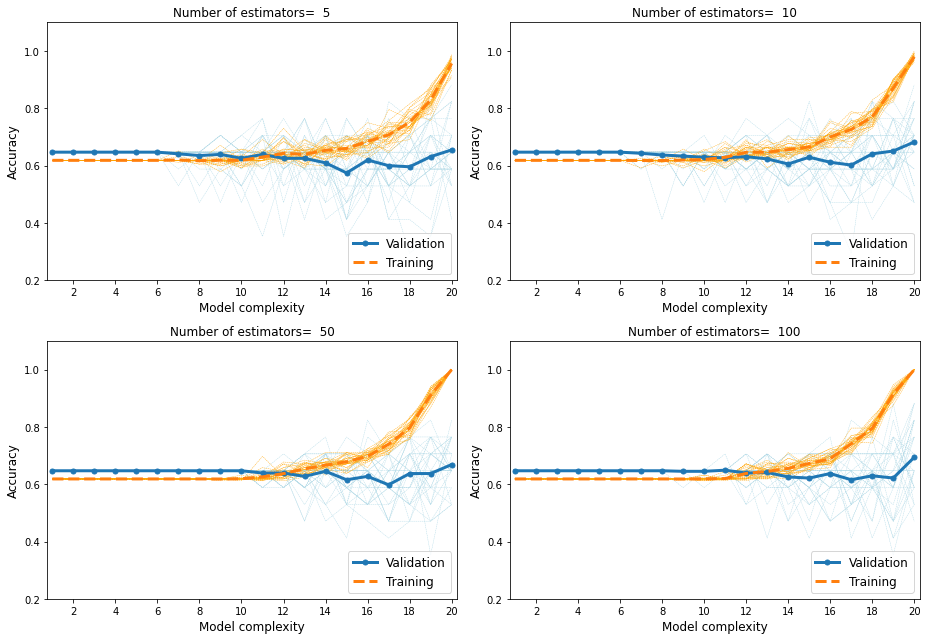

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(13,9))
for est, n, n1 in zip(n_est, [0,0,1,1], [0,1,0,1]):
  plt.sca(ax[n,n1])
  plt.plot(list(range(1,21)), [_[1] for _ in d_forest[f'r_all_{est}'].values()], linestyle='dashed', linewidth=0.4, color='lightblue' )
  plt.plot(list(range(1,21)), [_[0] for _ in d_forest[f'r_all_{est}'].values()], linestyle='dashed', color='orange', linewidth=0.4)
  plt.plot(list(range(1,21)), [_[1] for _ in d_forest[f'r_mean_{est}'].values()], label='Validation', marker='o', markersize=5, linewidth=3)
  plt.plot(list(range(1,21)), [_[0] for _ in d_forest[f'r_mean_{est}'].values()], label='Training', linestyle='dashed',linewidth=3, )
  plt.locator_params(axis='x', nbins=11)
  plt.ylim([0.2,1.1])
  plt.xlim([0.75,20.25])
  plt.xlabel('Model complexity', fontsize='large')
  plt.ylabel('Accuracy', fontsize='large')
  plt.legend(loc='lower right', fontsize='large')
  plt.title(f'Number of estimators=  {est}')
plt.tight_layout()
plt.show()

In [ ]:
def wrapper(func, args):
    return func(*args)

def create_combination_df():
  global params_df, previous_best
  params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
  params_df = params_df.where(pd.notnull(params_df), None)
  params_df['mean_accuracy'] = None
  print("# of initial combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))
  previous_best = 0

def update_combination_df():
  global params_df
  params_df = pd.concat([params_df, pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))], axis=0, ignore_index=True)
  params_df = params_df.where(pd.notnull(params_df), None)
  print("# of new combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def previous_accuracy_higher_than_new(new_best_result):
  global previous_best
  if previous_best >= new_best_result:
      print('Stopping search because no improvements','\nprevious_best = ',previous_best, '\nnew_best = ',new_best_result)
      previous_best = new_best_result 
      return True
  else:
      if previous_best != 0: print(f'Continuing search: new_best ({new_best_result}) vs previous_best ({previous_best} = {round(((new_best_result-previous_best)/previous_best)*100,3)}')
      previous_best = new_best_result
      return False 

def update_parameters(percentage_update):
    global params
    up, low = 1+1*(percentage_update/100), 1-1*(percentage_update/100)
    key_list = list(advanced_search.keys())
    for key in list(params.keys()):
        if key in key_list:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            if advanced_search[key][1] == 'int':
                try: advanced_search[key][2] == 'min=2'
                except IndexError: min_value = 1
                else: min_value = 2
                finally: 
                        params[key] = [int(round(max(best_param_value-max(best_param_value*(percentage_update/100),1), min_value))) , int(round(max(best_param_value+max(best_param_value*(percentage_update/100),1), min_value)))]                        
                        #params[key] = [int(max(best_param_value*low, min_value)), int(max(best_param_value*up, min_value))]
            elif advanced_search[key][1] == 'float':
                params[key] = [best_param_value*low, best_param_value*up]
        else:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [best_param_value]
    update_combination_df()

def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features, 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), error_score='raise')
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

def launch_search(crossval_repetitions=3):
  global params_df, temp_index
  print('# of crossval_repetitions: ', crossval_repetitions)
  temp_index = params_df.loc[params_df.mean_accuracy.isna()].index
  for i in temp_index:
    try:
      #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
      params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([crossval_repetitions]+ [params_df.loc[i,_] for _ in list(params.keys())])) 
      params_df.loc[i,'#crossval_repetitions'] = int(crossval_repetitions)
      print(dict(params_df.loc[i,[_ for _ in list(params_df) if _ != '#crossval_repetitions']]))
    except ValueError as E:
      print(f'skipped combination {i}:', E)
      pass  

In [ ]:
params = {'min_samples_split': [2,4],
              'min_samples_leaf': [2],
              'max_features': [None],
              'n_estimators': [100]}
advanced_search = {'n_estimators':[30, 'int'], 'min_samples_leaf':[20,'int']}

create_combination_df()
for loop in range(10):
  print(f'loop {loop}')
  launch_search(crossval_repetitions=min(5+(loop*2),10))
  if previous_accuracy_higher_than_new(params_df.loc[temp_index,'mean_accuracy'].max()):
    break
  else:
    update_parameters(percentage_update=30-(loop*2))


# of initial combinations:  2
loop 0
# of crossval_repetitions:  5
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'n_estimators': 100, 'mean_accuracy': 0.6494852941176471}
{'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'n_estimators': 100, 'mean_accuracy': 0.6723529411764706}
# of new combinations:  4
loop 1
# of crossval_repetitions:  7
{'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'n_estimators': 70, 'mean_accuracy': 0.6671218487394958}
{'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'n_estimators': 130, 'mean_accuracy': 0.6551470588235294}
{'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'n_estimators': 70, 'mean_accuracy': 0.6491071428571429}
{'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'n_estimators': 130, 'mean_accuracy': 0.647373949579832}
Stopping search because no improvements 
previous_best =  0.6723529411764706 
new_best =  0.6671218487394

In [ ]:
best_performers_df = params_df.sort_values(by=['mean_accuracy','#crossval_repetitions'], ascending=False).reset_index().copy()
best_performers_df

index  min_samples_split  ...  mean_accuracy #crossval_repetitions
0      1                  4  ...       0.672353                     5
1      2                  4  ...       0.667122                     7
2      3                  4  ...       0.655147                     7
3      0                  2  ...       0.649485                     5
4      4                  4  ...       0.649107                     7
5      5                  4  ...       0.647374                     7

[6 rows x 7 columns]

### AdaBoost

plotting for AdaBoost

In [ ]:
#repeating training and validation n times and save outputs to dictionary
n_est = [5,10,50,100]
d = {}
for est in n_est:
  d[f'r_mean_{est}'] = {}
  d[f'r_all_{est}'] = {}
  for c in range(20):
    temp_mt = []
    temp_mr = []
    for _ in range(30):
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
      #clf = DecisionTreeClassifier(criterion='gini', max_depth=maxDepth_dic.get(c), min_samples_split=2, min_samples_leaf=1, max_features=maxFeat_dic.get(c))
      clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=min_leaf_values[c], max_features=None), 
                              n_estimators=est)
      clf = clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_tr = clf.predict(X_train)
      temp_mt.append(round(accuracy_score(y_test, y_pred),3))
      temp_mr.append(accuracy_score(y_train, y_pred_tr))
    d[f'r_all_{est}'][c] = [temp_mr, temp_mt]
    d[f'r_mean_{est}'][c] = [np.array(temp_mr).mean(), np.array(temp_mt).mean()]
d_ada = d.copy()

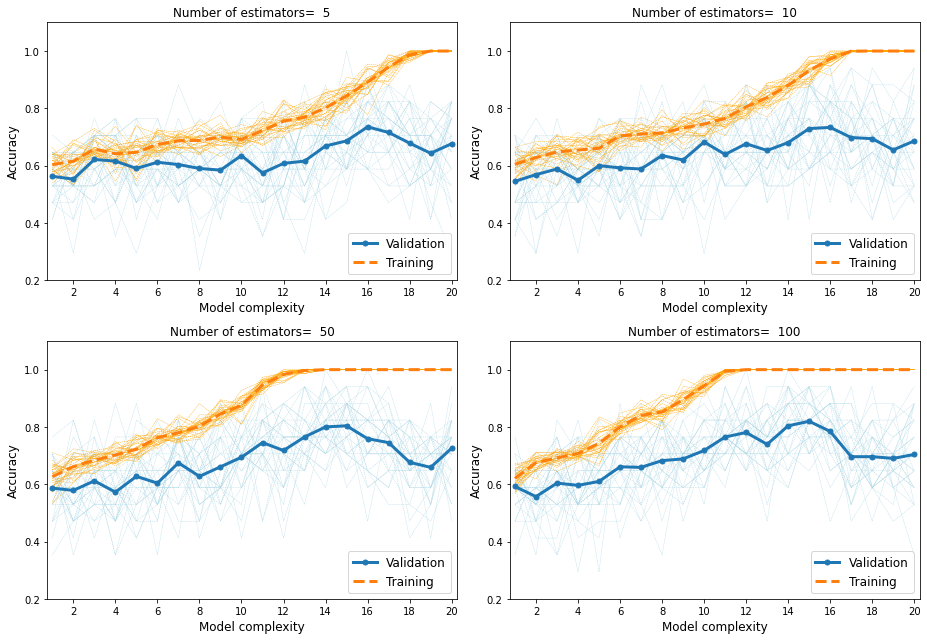

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(13,9))
for est, n, n1 in zip(n_est, [0,0,1,1], [0,1,0,1]):
  plt.sca(ax[n,n1])
  plt.plot(list(range(1,21)), [_[1] for _ in d_ada[f'r_all_{est}'].values()], linestyle='dashed', linewidth=0.4, color='lightblue' )
  plt.plot(list(range(1,21)), [_[0] for _ in d_ada[f'r_all_{est}'].values()], linestyle='dashed', color='orange', linewidth=0.4)
  plt.plot(list(range(1,21)), [_[1] for _ in d_ada[f'r_mean_{est}'].values()], label='Validation', marker='o', markersize=5, linewidth=3)
  plt.plot(list(range(1,21)), [_[0] for _ in d_ada[f'r_mean_{est}'].values()], label='Training', linestyle='dashed',linewidth=3, )
  plt.locator_params(axis='x', nbins=11)
  plt.ylim([0.2,1.1])
  plt.xlim([0.75,20.25])
  plt.xlabel('Model complexity', fontsize='large')
  plt.ylabel('Accuracy', fontsize='large')
  plt.legend(loc='lower right', fontsize='large')
  plt.title(f'Number of estimators=  {est}')
plt.tight_layout()
plt.show()

In [ ]:
min_leaf_values

[50, 48, 45, 42, 40, 37, 34, 32, 29, 27, 24, 21, 19, 16, 14, 11, 8, 6, 3, 1]

In [ ]:
def wrapper(func, args):
    return func(*args)

def create_combination_df():
  global params_df, previous_best
  params_df = pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))
  params_df = params_df.where(pd.notnull(params_df), None)
  params_df['mean_accuracy'] = None
  print("# of initial combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))
  previous_best = 0

def update_combination_df():
  global params_df
  params_df = pd.concat([params_df, pd.DataFrame(data = list(wrapper(itertools.product, [list(params.values())[_] for _ in range(len(params.keys()))])), columns=list(params.keys()))], axis=0, ignore_index=True)
  params_df = params_df.where(pd.notnull(params_df), None)
  print("# of new combinations: ", len(params_df.loc[params_df.mean_accuracy.isna()]))

def previous_accuracy_higher_than_new(new_best_result):
  global previous_best
  if previous_best >= new_best_result:
      print('Stopping search because no improvements','\nprevious_best = ',previous_best, '\nnew_best = ',new_best_result)
      previous_best = new_best_result 
      return True
  else:
      if previous_best != 0: print(f'Continuing search: new_best ({new_best_result}) vs previous_best ({previous_best} = {round(((new_best_result-previous_best)/previous_best)*100,3)}')
      previous_best = new_best_result
      return False 

def get_type(par, val):
  if advanced_search[par][1] == 'int': return int(val)
  if advanced_search[par][1] == 'float': return float(val)

def update_parameters(percentage_update):
    global params
    up, low = 1+1*(percentage_update/100), 1-1*(percentage_update/100)
    key_list = list(advanced_search.keys())
    for key in list(params.keys()):
        if key in key_list:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [get_type(key, best_param_value*low) , get_type(key, best_param_value*up)]
        else:
            best_param_value = params_df.sort_values(by='mean_accuracy', ascending=False).reset_index().loc[0,key]
            params[key] = [best_param_value]
    update_combination_df()

def get_average_performance(num_rep, min_samples_split, min_samples_leaf, max_features, n_estimators):
  mean_l = []
  for _ in range(num_rep):
    clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf, max_features=max_features), 
                            n_estimators=n_estimators)
    mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), error_score='raise')
    #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
    mean_l.append(mean_scores.mean())
  return (np.array(mean_l).mean())

def launch_search(crossval_repetitions=3):
  global params_df, temp_index
  print('# of crossval_repetitions: ', crossval_repetitions)
  temp_index = params_df.loc[params_df.mean_accuracy.isna()].index
  for i in temp_index:
    try:
      #params_df.loc[i,'mean_accuracy'] = get_average_performance(10, params_df.loc[i,'min_samples_split'], params_df.loc[i,'min_samples_leaf'], params_df.loc[i,'max_features'])
      params_df.loc[i,'mean_accuracy'] = wrapper(get_average_performance, list([crossval_repetitions]+ [params_df.loc[i,_] for _ in list(params.keys())])) 
      params_df.loc[i,'#crossval_repetitions'] = int(crossval_repetitions)
      print(dict(params_df.loc[i,[_ for _ in list(params_df) if _ != '#crossval_repetitions']]))
    except ValueError as E:
      print(f'skipped combination {i}:', E)
      pass  

In [ ]:
params = {'min_samples_split': [25],
              'min_samples_leaf': [25],
              'max_features': [None],
              'n_estimators': [50]}
advanced_search = {'n_estimators':[30, 'int'], 'min_samples_split':[20, 'int'], 'min_samples_leaf':[20,'int']}

create_combination_df()
for loop in range(10):
  print(f'loop {loop}')
  launch_search(crossval_repetitions=8+(loop*2))
  if previous_accuracy_higher_than_new(params_df.loc[temp_index,'mean_accuracy'].max()): 
    break
  else:
    update_parameters(percentage_update=20-(loop*2))


# of initial combinations:  1
loop 0
# of crossval_repetitions:  8
{'min_samples_split': 25, 'min_samples_leaf': 25, 'max_features': None, 'n_estimators': 50, 'mean_accuracy': 0.7056066176470588}
# of new combinations:  8
loop 1
# of crossval_repetitions:  10
{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': None, 'n_estimators': 40, 'mean_accuracy': 0.7219852941176471}
{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': None, 'n_estimators': 60, 'mean_accuracy': 0.7444117647058823}
{'min_samples_split': 20, 'min_samples_leaf': 30, 'max_features': None, 'n_estimators': 40, 'mean_accuracy': 0.6361764705882353}
{'min_samples_split': 20, 'min_samples_leaf': 30, 'max_features': None, 'n_estimators': 60, 'mean_accuracy': 0.6420588235294118}
{'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': None, 'n_estimators': 40, 'mean_accuracy': 0.7093382352941175}
{'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': None, 'n_estimators': 60, 'me

In [ ]:
best_performers_df = params_df.sort_values(by=['mean_accuracy','#crossval_repetitions'], ascending=False).reset_index().copy()
best_performers_df

index  min_samples_split  ...  mean_accuracy #crossval_repetitions
0      40                 22  ...       0.819751                    18
1      44                 19  ...       0.815588                    20
2      35                 17  ...       0.813113                    18
3      46                 24  ...       0.812077                    20
4      48                 24  ...       0.810882                    20
5      32                 20  ...       0.809697                    16
6      43                 19  ...       0.807426                    20
7      22                 18  ...       0.805987                    14
8      27                 15  ...       0.805032                    16
9      17                 13  ...       0.804963                    14
10     36                 17  ...       0.804453                    18
11     28                 15  ...       0.804067                    16
12     42                 19  ...       0.803143                    20
13     47                 24  ...       0.803125                    20
14     10                 16  ...       0.800245                    12
15     45                 24  ...       0.800202                    20
16     18                 13  ...       0.798293                    14
17     31                 20  ...       0.797243                    16
18     39                 22  ...       0.796078                    18
19     41                 19  ...       0.795551                    20
20     37                 22  ...       0.795016                    18
21     21                 18  ...       0.793409                    14
22     33                 17  ...       0.793321                    18
23     14                 23  ...       0.792831                    12
24     38                 22  ...       0.791891                    18
25     30                 20  ...       0.791866                    16
26     34                 17  ...       0.791217                    18
27     13                 23  ...       0.788572                    12
28     26                 15  ...       0.788465                    16
29      9                 16  ...       0.787776                    12
30     25                 15  ...       0.787178                    16
31     29                 20  ...       0.786696                    16
32     24                 18  ...       0.782143                    14
33     20                 13  ...       0.780725                    14
34     19                 13  ...       0.769196                    14
35     23                 18  ...       0.761896                    14
36      2                 20  ...       0.744412                    10
37     12                 16  ...       0.736489                    12
38      6                 30  ...       0.736287                    10
39     16                 23  ...       0.733793                    12
40      1                 20  ...       0.721985                    10
41     11                 16  ...       0.709773                    12
42      5                 30  ...       0.709338                    10
43      0                 25  ...       0.705607                     8
44     15                 23  ...       0.699418                    12
45      8                 30  ...          0.645                    10
46      4                 20  ...       0.642059                    10
47      7                 30  ...       0.641434                    10
48      3                 20  ...       0.636176                    10

[49 rows x 7 columns]

testing GridSearch best results

In [ ]:
#repeating experiment n times to get an idea of variance and avr performance
r = {}
for _ in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, stratify=y)
  clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=15, min_samples_split=22, max_features=None), n_estimators=103)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_tr = clf.predict(X_train)
  r[_] = [accuracy_score(y_train, y_pred_tr), round(accuracy_score(y_test, y_pred),3)]

print([r.get(key) for key in [np.random.randint(0,100) for _ in range(10)]])
print("average of training accuracy: ", round(np.array([_[0] for _ in r.values()]).mean(), 4))
print("average of validation accuracy: ", round(np.array([_[1] for _ in r.values()]).mean(), 4))
print("std of multiple hold-out validation accuracy: ", round(np.array([_[1] for _ in r.values()]).std(), 4))

In [ ]:
#1000 * 10 fold cross validation 
#get mean value
mean_l = []
for _ in range(100):
  clf = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2, max_features=0.8), n_estimators=200)
  mean_scores = cross_val_score(clf, X_encoded, y, cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True), n_jobs=-1)
  #print('Accuracy: %0.4f (+/- %0.2f)' % (mean_scores.mean(), mean_scores.std() * 2))
  mean_l.append(mean_scores.mean())
print(np.array(mean_l).mean())